#Credit Card Fraud Detection


##Introduction
Credit card fraud is an inclusive term for fraud committed using a payment card, such as a credit card or debit card. The purpose may be to obtain goods or services or to make payment to another account that is controlled by a criminal.

This has been a major problem to the victim and the credit card company itself, as it inflicts a financial loss to both parties. It is important for a credit card company to detect which transaction is fraud and which one is not.

With machine learning, we can detect the fraud transaction from historical data and denied the transaction so that both the company and the individual won’t have a loss.


##Problem Statement:
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for
different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using machine leaming is not only a trend but a necessity for them to put proactive monitoring and fraud
prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as
well as denials of legitimate transactions.

In this project we will detect fraudulent credit card transactions with the help of Machine leaming models. We will analyse customer-level data that has been
collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

##Data Understanding :

###Dataset:
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the
duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a
pool of 800 merchants.

###Objective:
Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit
card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random
Forests to classify transactions as fraudulent or legitimate.

##Table of Contents
1. Importing dependencies
2. Exploratory data analysis
3. Splitting the data into train & test data
4. Model Building

*   Perform cross validation with RepeatedKFold.
*   Perform cross validation with StratifiedKFold
*  RandomOverSampler with StratifiedKFold Cross Validation
*   Oversampling with SMOTE Oversampling
*   Oversampling with ADASYN Oversampling

5. Hyperparameter Tuning
6. Conclusion

##Importing Dependencies


In [ ]:

# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn. linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as Txgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


##Exploratory data analysis

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading the training data
df_tr = pd.read_csv('/content/gdrive/MyDrive/AFAME TECHNOLOGIES PROJECT/fraudTrain.csv')
df_tr.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
# Loading the testing data
df_tst = pd.read_csv('/content/gdrive/MyDrive/AFAME TECHNOLOGIES PROJECT/fraudTest.csv')
df_tst.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
# Checking the shape of training data
df_tr.shape

(1296675, 23)

In [ ]:
# Checking the shape of testing data
df_tst.shape

(555719, 23)

In [ ]:
# Checking the datatypes and null/non-null distribution of training data
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Checking the datatypes and null/non-null distribution of testing data
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
# Checking the distribution of numerical values in the training dataset
df_tr.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [ ]:
# Checking the distribution of numerical values in the testing dataset
df_tst.describe()

Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1.376029e+09   
50%        39.371600     -87.476900  2.408000e+03  1.380762e+09   
75%        41.894800     -80.175200  1.968500e+04  1.385867e+09   
max        65.689900     -67.950300  2.906700e+06  1.388534e+09   

           merch_lat     merch_long       is_fraud  
count  555719.000000  555719.000000  555719.000000  
mean       38.542798     -90.231380       0.003860  
std         5.095829      13.733071       0.062008  
min        19.027422    -166.671575       0.000000  
25%        34.755302     -96.905129       0.000000  
50%        39.376593     -87.445204       0.000000  
75%        41.954163     -80.264637       0.000000  
max        66.679297     -66.952026       1.000000

In [ ]:
# check for null values

df_tr.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# check for null values

df_tst.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Checking the class (is_fraud) distribution of the target variable in the training data
df_tr['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [ ]:
# Checking the class (is_fraud) distribution of the target variable in the testing data
df_tst['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

is_fraud
0    99.421135
1     0.578865
Name: is_fraud, dtype: float64


<Axes: ylabel='is_fraud'>

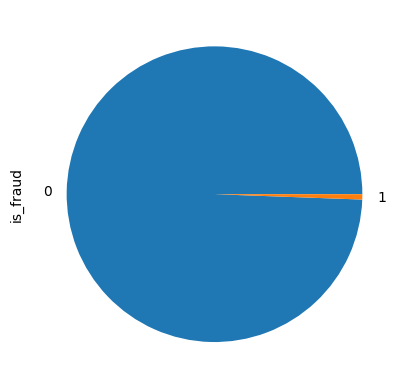

In [ ]:
# In the training data, Checking the classification of the target variable in percentage
print((df_tr.groupby('is_fraud')['is_fraud'].count()/df_tr['is_fraud'].count()) *100)
((df_tr.groupby('is_fraud')['is_fraud'].count()/df_tr['is_fraud'].count()) *100).plot.pie()

is_fraud
0    99.614014
1     0.385986
Name: is_fraud, dtype: float64


<Axes: ylabel='is_fraud'>

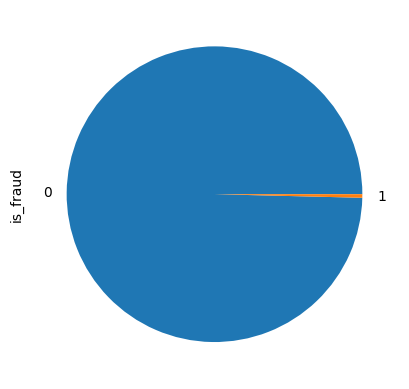

In [ ]:
# In the testing data, Checking the classification of the target variable in percentage
print((df_tst.groupby('is_fraud')['is_fraud'].count()/df_tst['is_fraud'].count()) *100)
((df_tst.groupby('is_fraud')['is_fraud'].count()/df_tst['is_fraud'].count()) *100).plot.pie()

In [ ]:
# In training data, Checking the % distribution of normal vs fraud
classes=df_tr['is_fraud'].value_counts()
normal_share=classes[0]/df_tr['is_fraud'].count()*100
fraud_share=classes[1]/df_tr['is_fraud'].count()*100

print(normal_share)
print(fraud_share)

99.42113482561166
0.5788651743883394


In [ ]:
# In testing data, Checking the % distribution of normal vs fraud
classes=df_tst['is_fraud'].value_counts()
normal_share=classes[0]/df_tst['is_fraud'].count()*100
fraud_share=classes[1]/df_tst['is_fraud'].count()*100

print(normal_share)
print(fraud_share)

99.61401355721146
0.3859864427885316


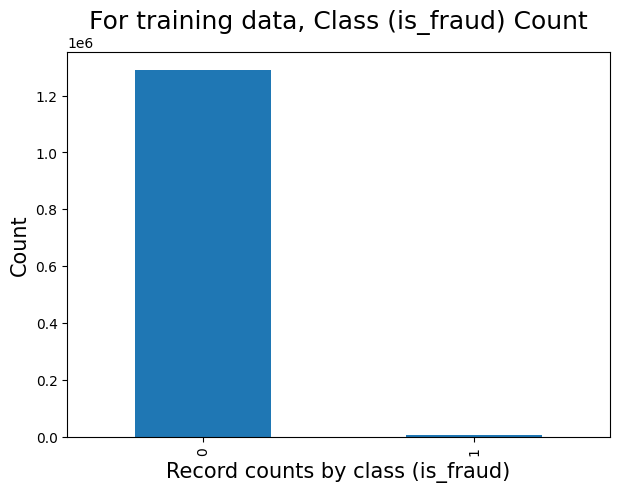

In [ ]:
# For training data, Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
# sns.countplot(df['Class'])
df_tr['is_fraud'].value_counts().plot(kind='bar')
plt.title("For training data, Class (is_fraud) Count", fontsize=18)
plt.xlabel("Record counts by class (is_fraud)", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

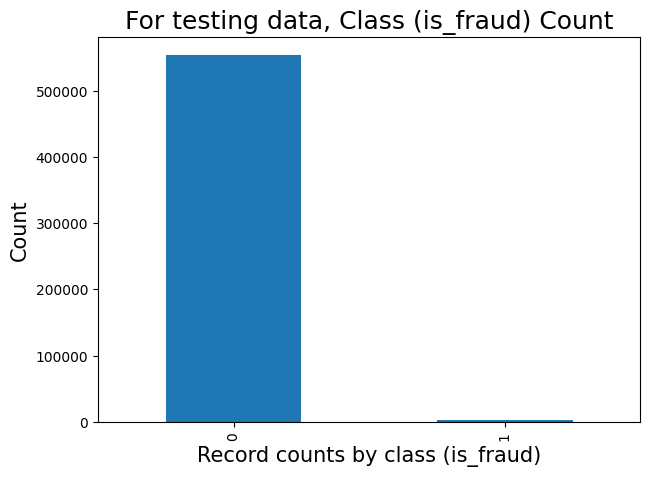

In [ ]:
# For testing data, Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
# sns.countplot(df['Class'])
df_tst['is_fraud'].value_counts().plot(kind='bar')
plt.title("For testing data, Class (is_fraud) Count", fontsize=18)
plt.xlabel("Record counts by class (is_fraud)", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

##Feature Engineering

In [ ]:

df_tr.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Drop Unnecessary Columns: Drop columns that do not provide meaningful information for fraud detection.
df_tr = df_tr.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num'])
df_tst = df_tst.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num'])

In [ ]:
df_tr.head()

trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job         dob   unix_time  merch_lat  \
0          Psychologist, counselling  1988-03-09  1325376018  36.011293   
1  Special educational needs teacher  1978-06-21  1325376044  49.159047   
2        Nature conservation officer  1962-01-19  1325376051  43.150704   
3                    Patent attorney  1967-01-12  1325376076  47.034331   
4     Dance movement psychotherapist  1986-03-28  1325376186  38.674999   

   merch_long  is_fraud  
0  -82.048315         0  
1 -118.186462         0  
2 -112.154481         0  
3 -112.561071         0  
4  -78.632459         0

In [ ]:
df_tst.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer  1968-03-19  1371816865  33.986391  -81.200714   
1  Sales professional, IT  1990-01-17  1371816873  39.450498 -109.960431   
2       Librarian, public  1970-10-21  1371816893  40.495810  -74.196111   
3            Set designer  1987-07-25  1371816915  28.812398  -80.883061   
4      Furniture designer  1955-07-06  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   city                   1296675 non-null  object 
 6   state                  1296675 non-null  object 
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  dob                    1296675 non-null  object 
 13  unix_time              1296675 non-null  int64  
 14  merch_lat         

In [ ]:
# Now for the df_tr, the no of unique values for categorical variables

cat_cols = df_tr.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
  unique_values = df_tr[col].nunique()
  print(f"Column: {col}, Unique values: {unique_values}")


Column: trans_date_trans_time, Unique values: 1274791
Column: merchant, Unique values: 693
Column: category, Unique values: 14
Column: gender, Unique values: 2
Column: city, Unique values: 894
Column: state, Unique values: 51
Column: job, Unique values: 494
Column: dob, Unique values: 968


In [ ]:
# Convert dob to age
current_year = pd.to_datetime('today').year
df_tr['dob'] = pd.to_datetime(df_tr['dob'])
df_tr['age'] = current_year - df_tr['dob'].dt.year

df_tr.drop('dob', axis=1, inplace=True)

df_tst['dob'] = pd.to_datetime(df_tst['dob'])
df_tst['age'] = current_year - df_tst['dob'].dt.year

df_tst.drop('dob', axis=1, inplace=True)

In [ ]:
df_tr.info(), df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   city                   1296675 non-null  object 
 6   state                  1296675 non-null  object 
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  unix_time              1296675 non-null  int64  
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

(None, None)

In [ ]:
# Now for the df_tr, the no of unique values for categorical variables

cat_cols = df_tr.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
  unique_values = df_tr[col].nunique()
  print(f"Column: {col}, Unique values: {unique_values}")


Column: trans_date_trans_time, Unique values: 1274791
Column: merchant, Unique values: 693
Column: category, Unique values: 14
Column: gender, Unique values: 2
Column: city, Unique values: 894
Column: state, Unique values: 51
Column: job, Unique values: 494


##### Label Encoding


* Label Encoding is a method to convert categorical data into numerical data by assigning each unique category an integer value, When the categorical variable has a small number of unique values, label encoding is simple and effective.


In [ ]:
# # One-hot encoding for low cardinality columns
# df_tr = pd.get_dummies(df_tr, columns=['category', 'gender', 'state'])
# df_tst = pd.get_dummies(df_tst, columns=['category', 'gender', 'state'])

columns=['category', 'gender', 'state']
# Apply label encoding for low cardinality columns

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in columns:
    df_tr[col] = label_encoder.fit_transform(df_tr[col])
    df_tst[col] = label_encoder.fit_transform(df_tst[col])



##### Target Encoding
*  Target Encoding (also known as mean encoding, likelihood encoding, or impact encoding) is a method used to convert categorical variables into numerical values by replacing each category with a statistical measure (usually the mean) of the target variable (e.g., the probability of fraud for each category).

In [ ]:
# Target encoding for high cardinality columns (e.g., merchant, city, job)

tar_cat_cols = ['merchant', 'city', 'job']
for tar_col in tar_cat_cols:
    # Calculate the mean fraud rate per merchant
    mean_encoded = df_tr.groupby(tar_col)['is_fraud'].mean()
    # Replace merchant with mean fraud rate
    df_tr[tar_col +'_encoded'] = df_tr[tar_col].map(mean_encoded)

    mean_encoded = df_tst.groupby(tar_col)['is_fraud'].mean()
    df_tst[tar_col +'_encoded'] = df_tst[tar_col].map(mean_encoded)
    # Drop the original merchant column
    df_tr.drop(tar_col, axis=1, inplace=True)
    df_tst.drop(tar_col, axis=1, inplace=True)


In [ ]:
df_tr.info(), df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  int64  
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  int64  
 4   state                  1296675 non-null  int64  
 5   zip                    1296675 non-null  int64  
 6   lat                    1296675 non-null  float64
 7   long                   1296675 non-null  float64
 8   city_pop               1296675 non-null  int64  
 9   unix_time              1296675 non-null  int64  
 10  merch_lat              1296675 non-null  float64
 11  merch_long             1296675 non-null  float64
 12  is_fraud               1296675 non-null  int64  
 13  age                    1296675 non-null  int64  
 14  merchant_encoded  

(None, None)

In [ ]:
# Now for the df_tr, the no of unique values for categorical variables

cat_cols = df_tr.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
  unique_values = df_tr[col].nunique()
  print(f"Column: {col}, Unique values: {unique_values}")


Column: trans_date_trans_time, Unique values: 1274791


In [ ]:
# Convert trans_date_trans_time to datetime dtype

df_tr['trans_date_trans_time'] = pd.to_datetime(df_tr['trans_date_trans_time'])

# Extract features from datetime
df_tr['transaction_year'] = df_tr['trans_date_trans_time'].dt.year
df_tr['transaction_month'] = df_tr['trans_date_trans_time'].dt.month
df_tr['transaction_day'] = df_tr['trans_date_trans_time'].dt.day
df_tr['transaction_hour'] = df_tr['trans_date_trans_time'].dt.hour
df_tr['transaction_dayofweek'] = df_tr['trans_date_trans_time'].dt.dayofweek
df_tr['transaction_weekofyear'] = df_tr['trans_date_trans_time'].dt.isocalendar().week

# Drop the columns if not needed
df_tr = df_tr.drop(columns=['transaction_year', 'trans_date_trans_time'],)



# Convert trans_date_trans_time to datetime dtype

df_tst['trans_date_trans_time'] = pd.to_datetime(df_tst['trans_date_trans_time'])

# Extract features from datetime
df_tst['transaction_year'] = df_tst['trans_date_trans_time'].dt.year
df_tst['transaction_month'] = df_tst['trans_date_trans_time'].dt.month
df_tst['transaction_day'] = df_tst['trans_date_trans_time'].dt.day
df_tst['transaction_hour'] = df_tst['trans_date_trans_time'].dt.hour
df_tst['transaction_dayofweek'] = df_tst['trans_date_trans_time'].dt.dayofweek
df_tst['transaction_weekofyear'] = df_tst['trans_date_trans_time'].dt.isocalendar().week

# Drop the columns if not needed
df_tst = df_tst.drop(columns=['transaction_year', 'trans_date_trans_time'])



# preserving df['unix_time'] as it is, because it containes each info regarding time of transaction


In [ ]:
df_tr.head()

category     amt  gender  state    zip      lat      long  city_pop  \
0         8    4.97       0     27  28654  36.0788  -81.1781      3495   
1         4  107.23       0     47  99160  48.8878 -118.2105       149   
2         0  220.11       1     13  83252  42.1808 -112.2620      4154   
3         2   45.00       1     26  59632  46.2306 -112.1138      1939   
4         9   41.96       1     45  24433  38.4207  -79.4629        99   

    unix_time  merch_lat  ...  is_fraud  age  merchant_encoded  city_encoded  \
0  1325376018  36.011293  ...         0   36          0.014207      0.000000   
1  1325376044  49.159047  ...         0   46          0.010787      0.000000   
2  1325376051  43.150704  ...         0   62          0.002111      0.000000   
3  1325376076  47.034331  ...         0   57          0.003444      0.030426   
4  1325376186  38.674999  ...         0   38          0.003769      0.000000   

   job_encoded  transaction_month  transaction_day  transaction_hour  \
0     0.001693                  1                1                 0   
1     0.002157                  1                1                 0   
2     0.015656                  1                1                 0   
3     0.007905                  1                1                 0   
4     0.000000                  1                1                 0   

   transaction_dayofweek  transaction_weekofyear  
0                      1                       1  
1                      1                       1  
2                      1                       1  
3                      1                       1  
4                      1                       1  

[5 rows x 21 columns]

In [ ]:
df_tst.head()

category    amt  gender  state    zip      lat      long  city_pop  \
0        10   2.86       1     39  29209  33.9659  -80.9355    333497   
1        10  29.84       0     43  84002  40.3207 -110.4360       302   
2         5  41.28       0     33  11710  40.6729  -73.5365     34496   
3         9  60.05       1      8  32780  28.5697  -80.8191     54767   
4        13   3.19       1     21  49632  44.2529  -85.0170      1126   

    unix_time  merch_lat  ...  is_fraud  age  merchant_encoded  city_encoded  \
0  1371816865  33.986391  ...         0   56          0.004076      0.000000   
1  1371816873  39.450498  ...         0   34          0.001274      0.000000   
2  1371816893  40.495810  ...         0   54          0.001325      0.000000   
3  1371816915  28.812398  ...         0   37          0.004219      0.015083   
4  1371816917  44.959148  ...         0   69          0.002703      0.000000   

   job_encoded  transaction_month  transaction_day  transaction_hour  \
0     0.000000                  6               21                12   
1     0.000000                  6               21                12   
2     0.005798                  6               21                12   
3     0.015083                  6               21                12   
4     0.000000                  6               21                12   

   transaction_dayofweek  transaction_weekofyear  
0                      6                      25  
1                      6                      25  
2                      6                      25  
3                      6                      25  
4                      6                      25  

[5 rows x 21 columns]

In [ ]:
df_tr.info(), df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   category                1296675 non-null  int64  
 1   amt                     1296675 non-null  float64
 2   gender                  1296675 non-null  int64  
 3   state                   1296675 non-null  int64  
 4   zip                     1296675 non-null  int64  
 5   lat                     1296675 non-null  float64
 6   long                    1296675 non-null  float64
 7   city_pop                1296675 non-null  int64  
 8   unix_time               1296675 non-null  int64  
 9   merch_lat               1296675 non-null  float64
 10  merch_long              1296675 non-null  float64
 11  is_fraud                1296675 non-null  int64  
 12  age                     1296675 non-null  int64  
 13  merchant_encoded        1296675 non-null  float64
 14  ci

(None, None)

In [ ]:
# Now for the df_tr, the no of unique values for categorical variables

cat_cols = df_tr.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
  unique_values = df_tr[col].nunique()
  print(f"Column: {col}, Unique values: {unique_values}")


In [ ]:


# Checking the correlations for training data
corr = df_tr.corr()
corr

category       amt    gender     state       zip  \
category                1.000000  0.030867 -0.028259  0.000211  0.002371   
amt                     0.030867  1.000000  0.001034  0.001718  0.001843   
gender                 -0.028259  0.001034  1.000000 -0.031794 -0.065951   
state                   0.000211  0.001718 -0.031794  1.000000 -0.116264   
zip                     0.002371  0.001843 -0.065951 -0.116264  1.000000   
lat                    -0.008660 -0.001926  0.042935  0.213270 -0.114290   
long                   -0.000767 -0.000187  0.050404  0.132465 -0.909732   
city_pop                0.009386  0.005818 -0.028649 -0.012197  0.078467   
unix_time               0.000182 -0.000293 -0.000960  0.001071  0.000670   
merch_lat              -0.008519 -0.001873  0.042645  0.211844 -0.113561   
merch_long             -0.000736 -0.000151  0.050350  0.132346 -0.908924   
is_fraud                0.020205  0.219404  0.007642  0.001730 -0.002162   
age                    -0.003848 -0.009748  0.004976 -0.051538  0.011004   
merchant_encoded        0.267713  0.094412 -0.010295  0.003062  0.005092   
city_encoded            0.006811  0.070752  0.024497  0.005832 -0.006166   
job_encoded             0.003406  0.041921  0.021765  0.007135 -0.007562   
transaction_month       0.000768 -0.001748 -0.000215  0.000276  0.000852   
transaction_day        -0.000720  0.000629 -0.000206 -0.000561 -0.000607   
transaction_hour        0.158323 -0.022811 -0.037835  0.006881  0.005938   
transaction_dayofweek  -0.001104 -0.001001 -0.000914  0.000874 -0.001353   
transaction_weekofyear  0.000538 -0.002209 -0.000527  0.000181  0.000919   

                             lat      long  city_pop  unix_time  merch_lat  \
category               -0.008660 -0.000767  0.009386   0.000182  -0.008519   
amt                    -0.001926 -0.000187  0.005818  -0.000293  -0.001873   
gender                  0.042935  0.050404 -0.028649  -0.000960   0.042645   
state                   0.213270  0.132465 -0.012197   0.001071   0.211844   
zip                    -0.114290 -0.909732  0.078467   0.000670  -0.113561   
lat                     1.000000 -0.015533 -0.155730   0.000632   0.993592   
long                   -0.015533  1.000000 -0.052715  -0.000642  -0.015452   
city_pop               -0.155730 -0.052715  1.000000  -0.001714  -0.154781   
unix_time               0.000632 -0.000642 -0.001714   1.000000   0.000561   
merch_lat               0.993592 -0.015452 -0.154781   0.000561   1.000000   
merch_long             -0.015509  0.999120 -0.052687  -0.000635  -0.015431   
is_fraud                0.001894  0.001721  0.002136  -0.005078   0.001741   
age                     0.047845 -0.030231 -0.091271  -0.003655   0.047458   
merchant_encoded        0.000026 -0.004490  0.000468   0.000054  -0.000027   
city_encoded            0.008451  0.004272  0.006610  -0.003709   0.008336   
job_encoded             0.004126  0.006846  0.003718  -0.001641   0.003842   
transaction_month      -0.001072 -0.001213  0.000137   0.184868  -0.001116   
transaction_day        -0.000138  0.000031  0.000159   0.017162  -0.000276   
transaction_hour       -0.011508 -0.002290  0.020381   0.000756  -0.011378   
transaction_dayofweek   0.000498  0.001593  0.002439  -0.029284   0.000263   
transaction_weekofyear -0.000864 -0.001313 -0.000118   0.178587  -0.000923   

                        ...  is_fraud       age  merchant_encoded  \
category                ...  0.020205 -0.003848          0.267713   
amt                     ...  0.219404 -0.009748          0.094412   
gender                  ...  0.007642  0.004976         -0.010295   
state                   ...  0.001730 -0.051538          0.003062   
zip                     ... -0.002162  0.011004          0.005092   
lat                     ...  0.001894  0.047845          0.000026   
long                    ...  0.001721 -0.030231         -0.004490   
city_pop                ...  0.002136 -0.091271          0.000468   
unix_time    

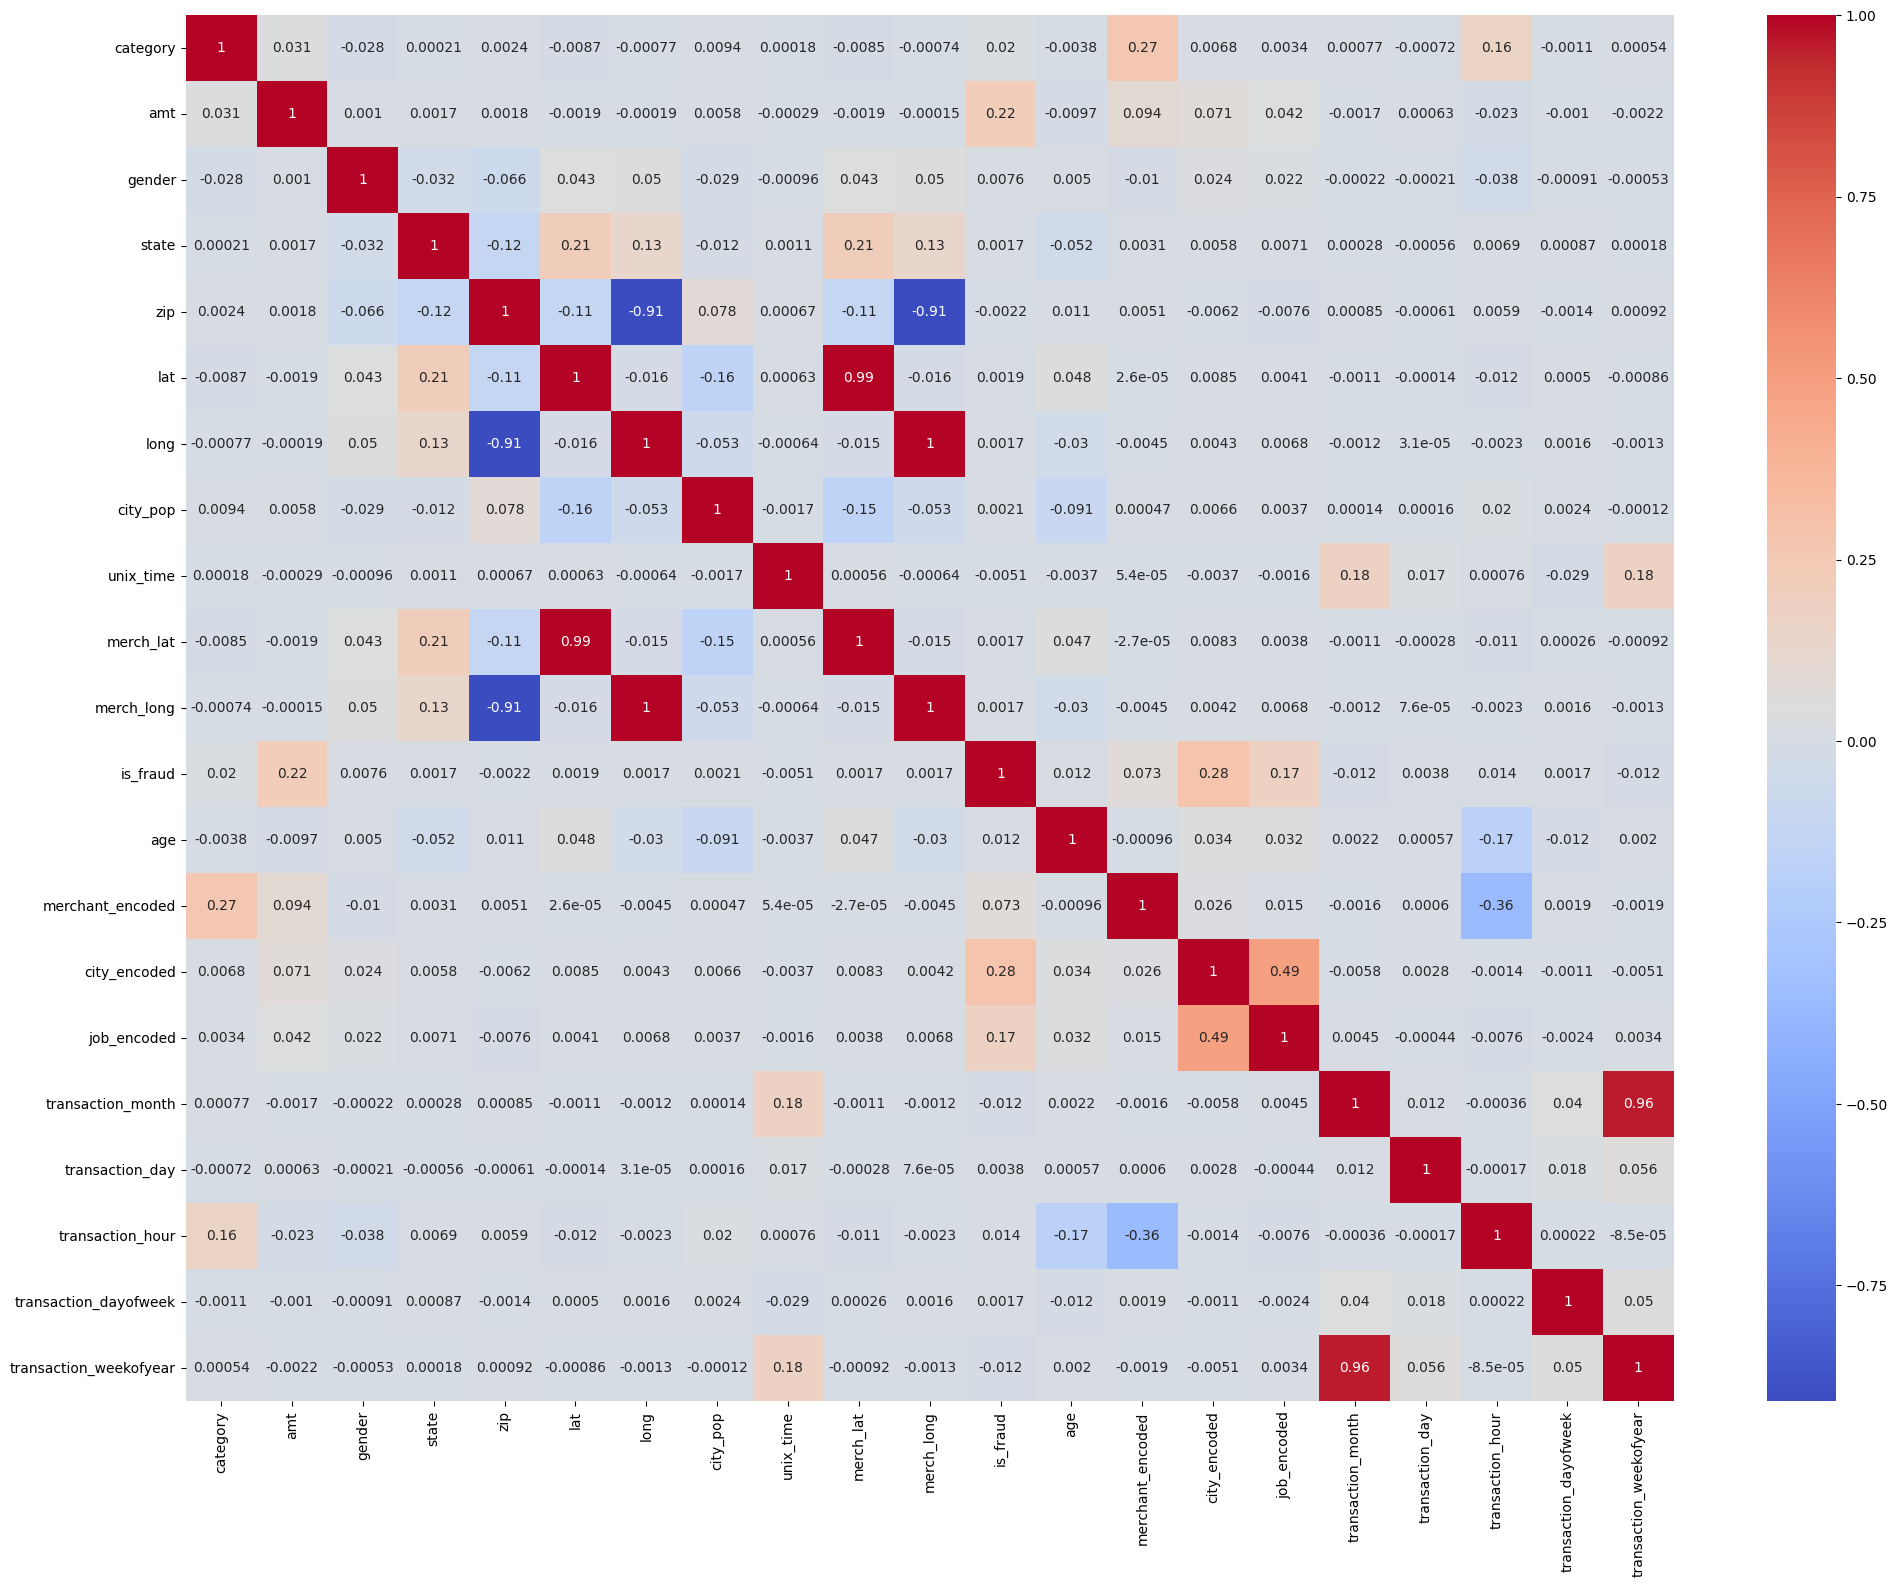

In [ ]:
# checking the correlations in the heatmap for training data
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
# Checking the correlations for testing data
corr = df_tst.corr()
corr

category       amt    gender     state       zip  \
category                1.000000  0.026811 -0.027684  0.000169  0.004510   
amt                     0.026811  1.000000  0.000027 -0.002561  0.002310   
gender                 -0.027684  0.000027  1.000000 -0.030149 -0.066467   
state                   0.000169 -0.002561 -0.030149  1.000000 -0.112426   
zip                     0.004510  0.002310 -0.066467 -0.112426  1.000000   
lat                    -0.008215  0.002339  0.042692  0.213116 -0.115173   
long                   -0.002902 -0.002046  0.051235  0.126008 -0.909942   
city_pop                0.009164  0.002760 -0.029367 -0.011885  0.075571   
unix_time               0.001097 -0.000974 -0.000577 -0.000031  0.001395   
merch_lat              -0.008180  0.002404  0.042569  0.211977 -0.114809   
merch_long             -0.002967 -0.002053  0.051203  0.125936 -0.909117   
is_fraud                0.016980  0.182267  0.000748 -0.006075 -0.002271   
age                    -0.001888 -0.012865  0.004505 -0.047462  0.008823   
merchant_encoded        0.247175  0.081423 -0.007887  0.001870  0.005351   
city_encoded            0.008055  0.063118  0.002090 -0.020067 -0.009167   
job_encoded             0.002218  0.029744 -0.014003 -0.023740 -0.026807   
transaction_month       0.000264 -0.000717 -0.000445  0.000075  0.001401   
transaction_day         0.000558 -0.000829  0.000382 -0.000965 -0.000168   
transaction_hour        0.157214 -0.029860 -0.038515  0.007427  0.005966   
transaction_dayofweek  -0.001757  0.003414  0.001845 -0.000177 -0.000075   
transaction_weekofyear  0.000419 -0.000956 -0.000462 -0.000060  0.001368   

                             lat      long  city_pop  unix_time  merch_lat  \
category               -0.008215 -0.002902  0.009164   0.001097  -0.008180   
amt                     0.002339 -0.002046  0.002760  -0.000974   0.002404   
gender                  0.042692  0.051235 -0.029367  -0.000577   0.042569   
state                   0.213116  0.126008 -0.011885  -0.000031   0.211977   
zip                    -0.115173 -0.909942  0.075571   0.001395  -0.114809   
lat                     1.000000 -0.012892 -0.152666   0.000301   0.993557   
long                   -0.012892  1.000000 -0.051524  -0.001460  -0.012551   
city_pop               -0.152666 -0.051524  1.000000  -0.000740  -0.151703   
unix_time               0.000301 -0.001460 -0.000740   1.000000   0.000365   
merch_lat               0.993557 -0.012551 -0.151703   0.000365   1.000000   
merch_long             -0.012831  0.999115 -0.051489  -0.001485  -0.012496   
is_fraud                0.005863 -0.000972 -0.004910  -0.013066   0.005812   
age                     0.045446 -0.027613 -0.089932  -0.002639   0.045100   
merchant_encoded        0.004339 -0.004916  0.000048  -0.001426   0.004433   
city_encoded            0.027593 -0.002636 -0.016502  -0.000866   0.027293   
job_encoded            -0.002066  0.017402 -0.029726  -0.004033  -0.002126   
transaction_month       0.000686 -0.001510 -0.001117   0.988955   0.000750   
transaction_day        -0.002297  0.000334  0.001938   0.044348  -0.002302   
transaction_hour       -0.010676 -0.001595  0.018937  -0.000304  -0.010512   
transaction_dayofweek   0.001093  0.000099 -0.002010  -0.009987   0.001199   
transaction_weekofyear  0.000312 -0.001455 -0.000755   0.999335   0.000371   

                        ...  is_fraud       age  merchant_encoded  \
category                ...  0.016980 -0.001888          0.247175   
amt                     ...  0.182267 -0.012865          0.081423   
gender                  ...  0.000748  0.004505         -0.007887   
state                   ... -0.006075 -0.047462          0.001870   
zip                     ... -0.002271  0.008823          0.005351   
lat                     ...  0.005863  0.045446          0.004339   
long                    ... -0.000972 -0.027613         -0.004916   
city_pop                ... -0.004910 -0.089932          0.000048   
unix_time    

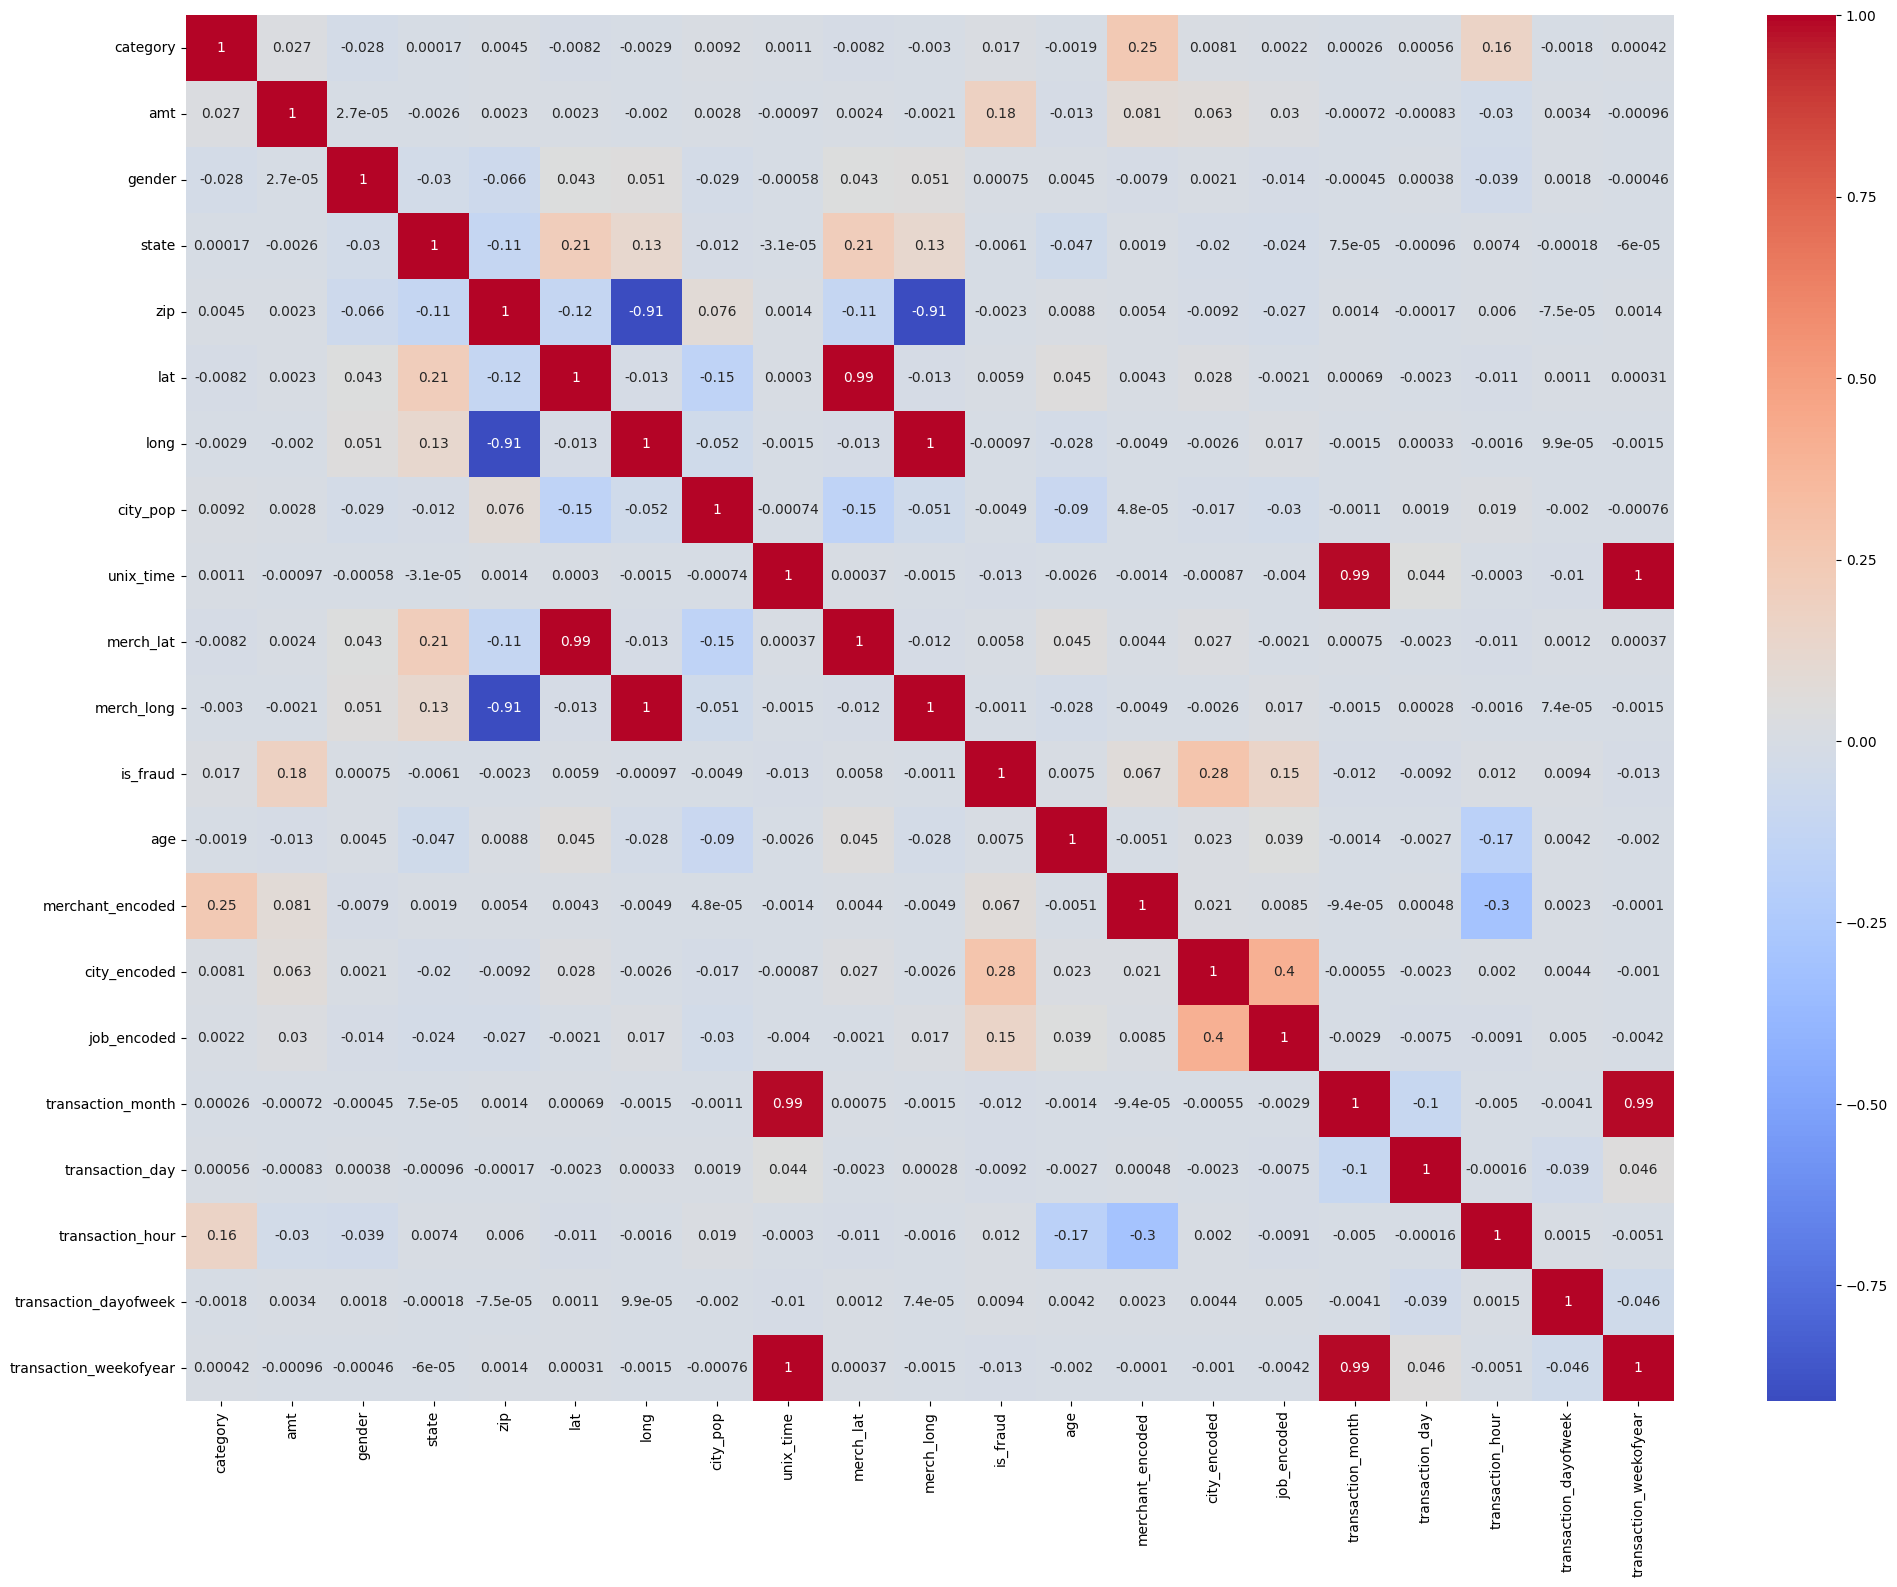

In [ ]:
# checking the correlations in the heatmap for testing data
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

### Saving the Preprocessed data in csv format

In [ ]:
#save the both train and test dataframe into csv format
df_tr.to_csv('/content/drive/My Drive/pp_fraudTrain.csv')
df_tst.to_csv('/content/drive/My Drive/pp_fraudTest.csv')

##Splitting the data into train & test data

Since we have already train and test data

In [ ]:
# splitting the training dataset into x and y
y_train = df_tr['is_fraud']
X_train = df_tr.drop('is_fraud', axis=1)

In [ ]:
# checking for some rows of x
X_train.head()

category     amt  gender  state    zip      lat      long  city_pop  \
0         8    4.97       0     27  28654  36.0788  -81.1781      3495   
1         4  107.23       0     47  99160  48.8878 -118.2105       149   
2         0  220.11       1     13  83252  42.1808 -112.2620      4154   
3         2   45.00       1     26  59632  46.2306 -112.1138      1939   
4         9   41.96       1     45  24433  38.4207  -79.4629        99   

    unix_time  merch_lat  merch_long  age  merchant_encoded  city_encoded  \
0  1325376018  36.011293  -82.048315   36          0.014207      0.000000   
1  1325376044  49.159047 -118.186462   46          0.010787      0.000000   
2  1325376051  43.150704 -112.154481   62          0.002111      0.000000   
3  1325376076  47.034331 -112.561071   57          0.003444      0.030426   
4  1325376186  38.674999  -78.632459   38          0.003769      0.000000   

   job_encoded  transaction_month  transaction_day  transaction_hour  \
0     0.001693                  1                1                 0   
1     0.002157                  1                1                 0   
2     0.015656                  1                1                 0   
3     0.007905                  1                1                 0   
4     0.000000                  1                1                 0   

   transaction_dayofweek  transaction_weekofyear  
0                      1                       1  
1                      1                       1  
2                      1                       1  
3                      1                       1  
4                      1                       1

In [ ]:
# checking for some rows of y
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
# splitting the training dataset into x and y
y_test = df_tst['is_fraud']
X_test = df_tst.drop('is_fraud', axis=1)

In [ ]:
# checking for some rows of x
X_test.head()

category    amt  gender  state    zip      lat      long  city_pop  \
0        10   2.86       1     39  29209  33.9659  -80.9355    333497   
1        10  29.84       0     43  84002  40.3207 -110.4360       302   
2         5  41.28       0     33  11710  40.6729  -73.5365     34496   
3         9  60.05       1      8  32780  28.5697  -80.8191     54767   
4        13   3.19       1     21  49632  44.2529  -85.0170      1126   

    unix_time  merch_lat  merch_long  age  merchant_encoded  city_encoded  \
0  1371816865  33.986391  -81.200714   56          0.004076      0.000000   
1  1371816873  39.450498 -109.960431   34          0.001274      0.000000   
2  1371816893  40.495810  -74.196111   54          0.001325      0.000000   
3  1371816915  28.812398  -80.883061   37          0.004219      0.015083   
4  1371816917  44.959148  -85.884734   69          0.002703      0.000000   

   job_encoded  transaction_month  transaction_day  transaction_hour  \
0     0.000000                  6               21                12   
1     0.000000                  6               21                12   
2     0.005798                  6               21                12   
3     0.015083                  6               21                12   
4     0.000000                  6               21                12   

   transaction_dayofweek  transaction_weekofyear  
0                      6                      25  
1                      6                      25  
2                      6                      25  
3                      6                      25  
4                      6                      25

In [ ]:
# checking for some rows of y
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
# # splitting the dataset using train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

Preserve X_test & y_test to evaluate on the test data once we build the model

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_train))
print(np.sum(y_test))

7506
2145


######Plotting the distribution of each features

Here we will observe the distribution of every features in different classes( is_fraud)


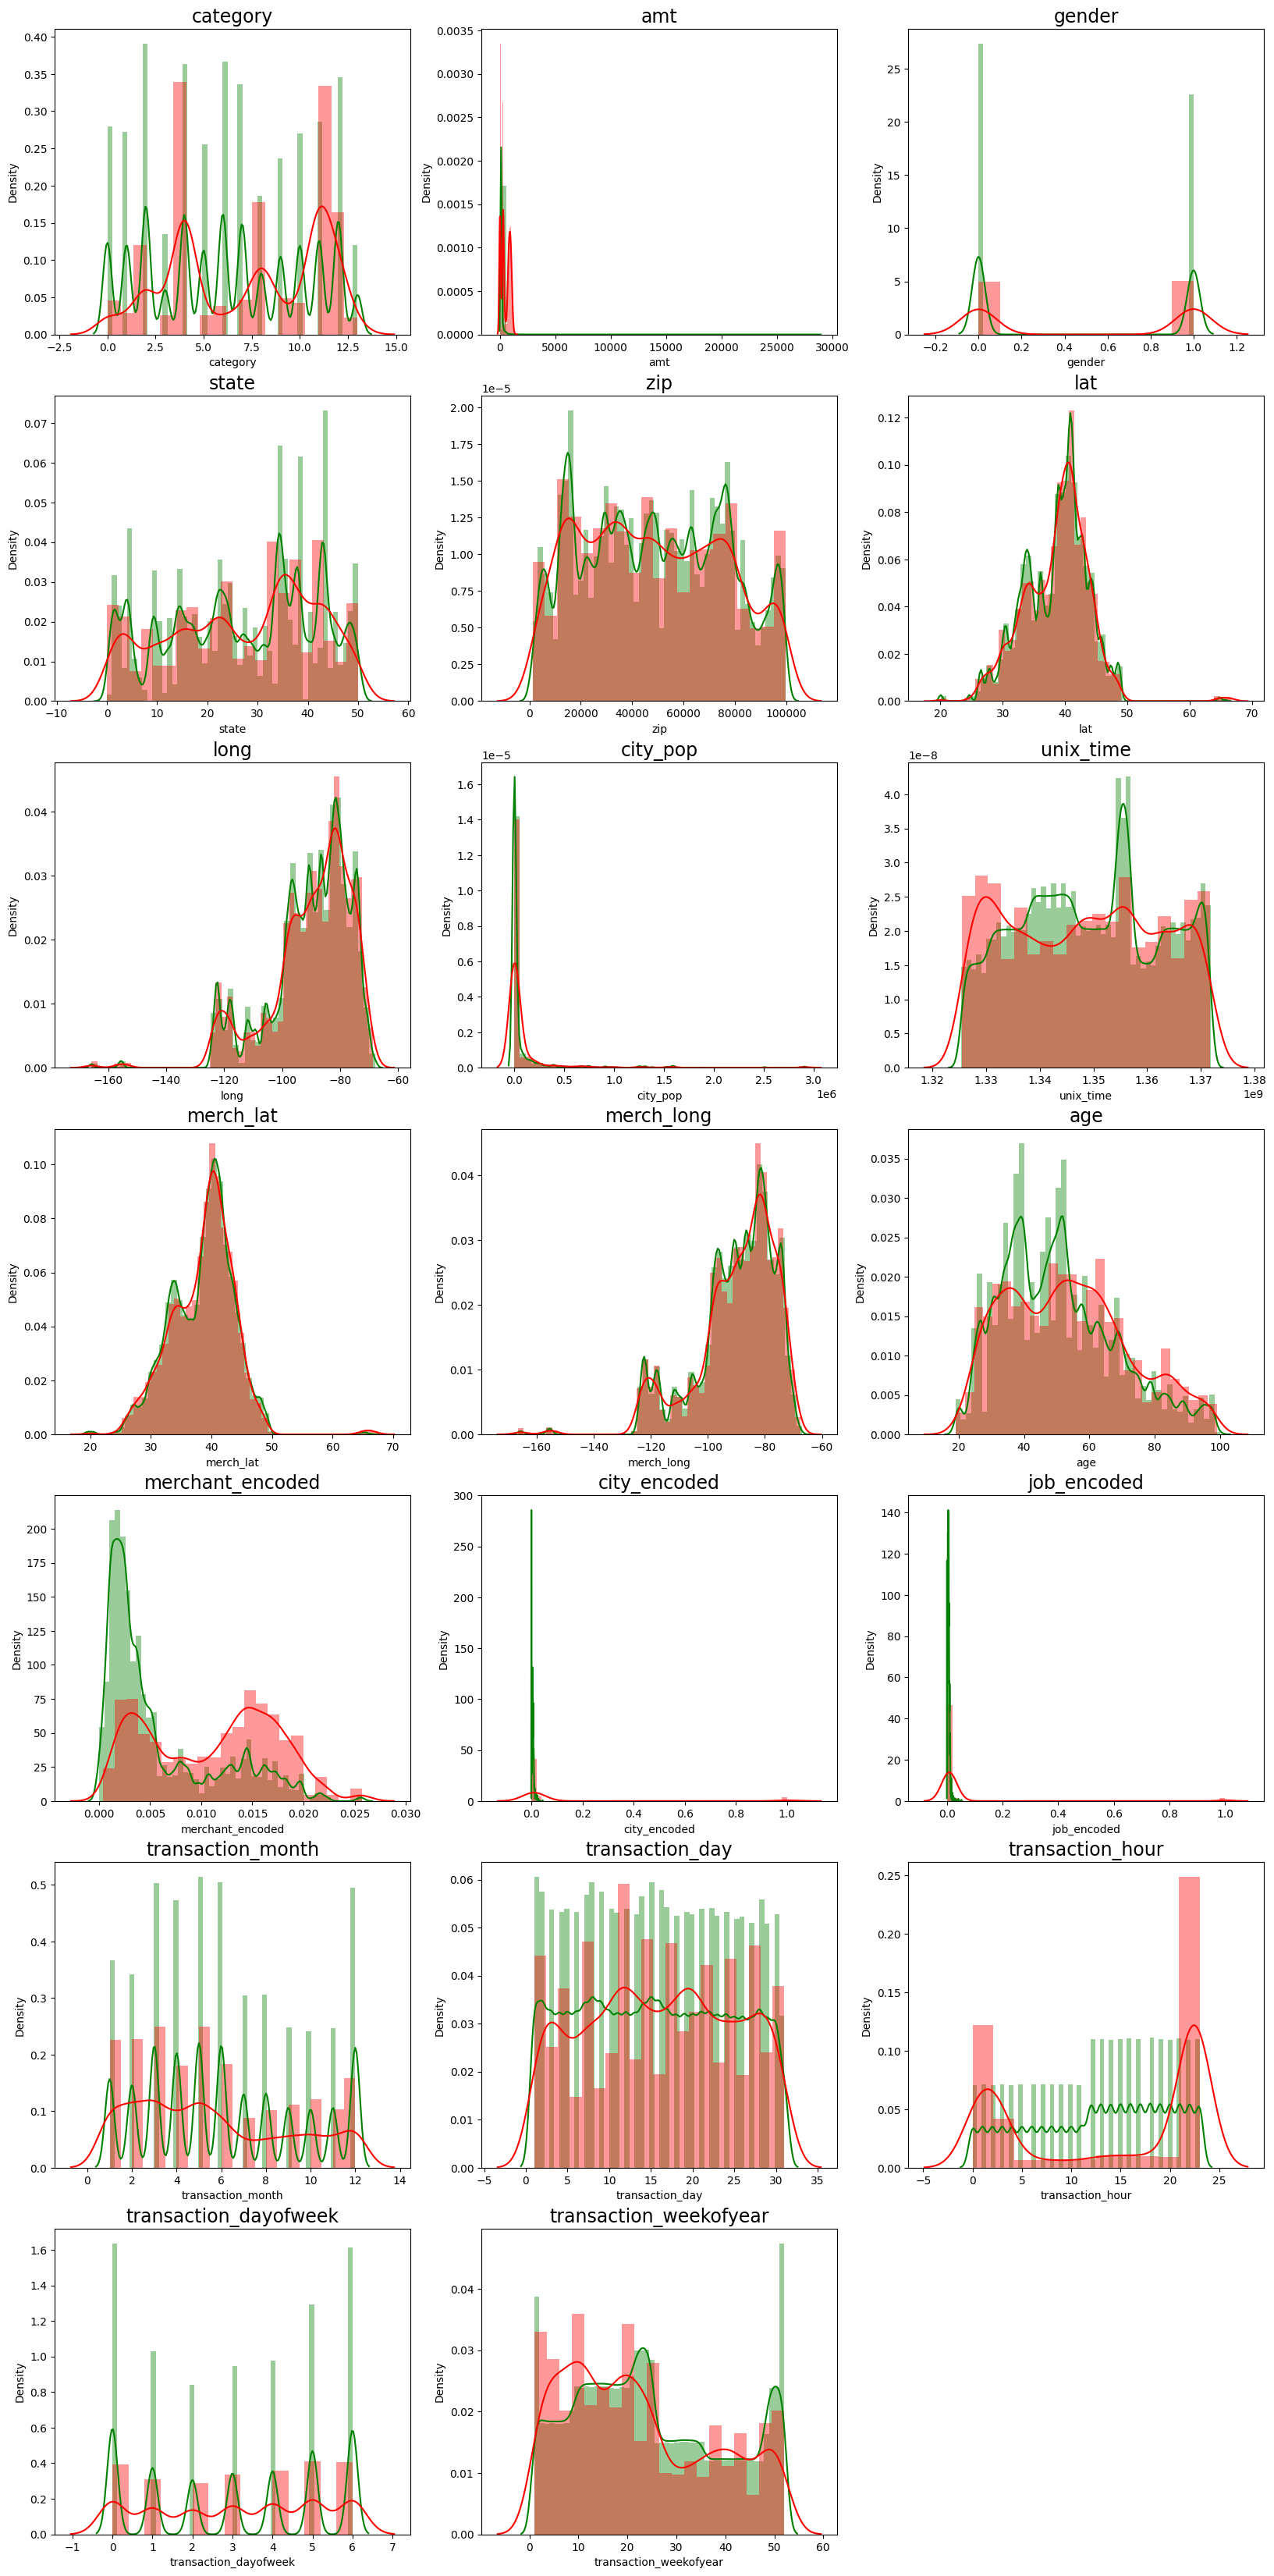

In [ ]:
# Accumulating all the column names (features) under one variable, for training data
cols = list(X_train.columns.values)

# plot the histogram of a variable(feature) from the training dataset to see the skewness
normal_records = df_tr.is_fraud == 0
fraud_records = df_tr.is_fraud == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train[col][normal_records], color='green')
  sns.distplot(X_train[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

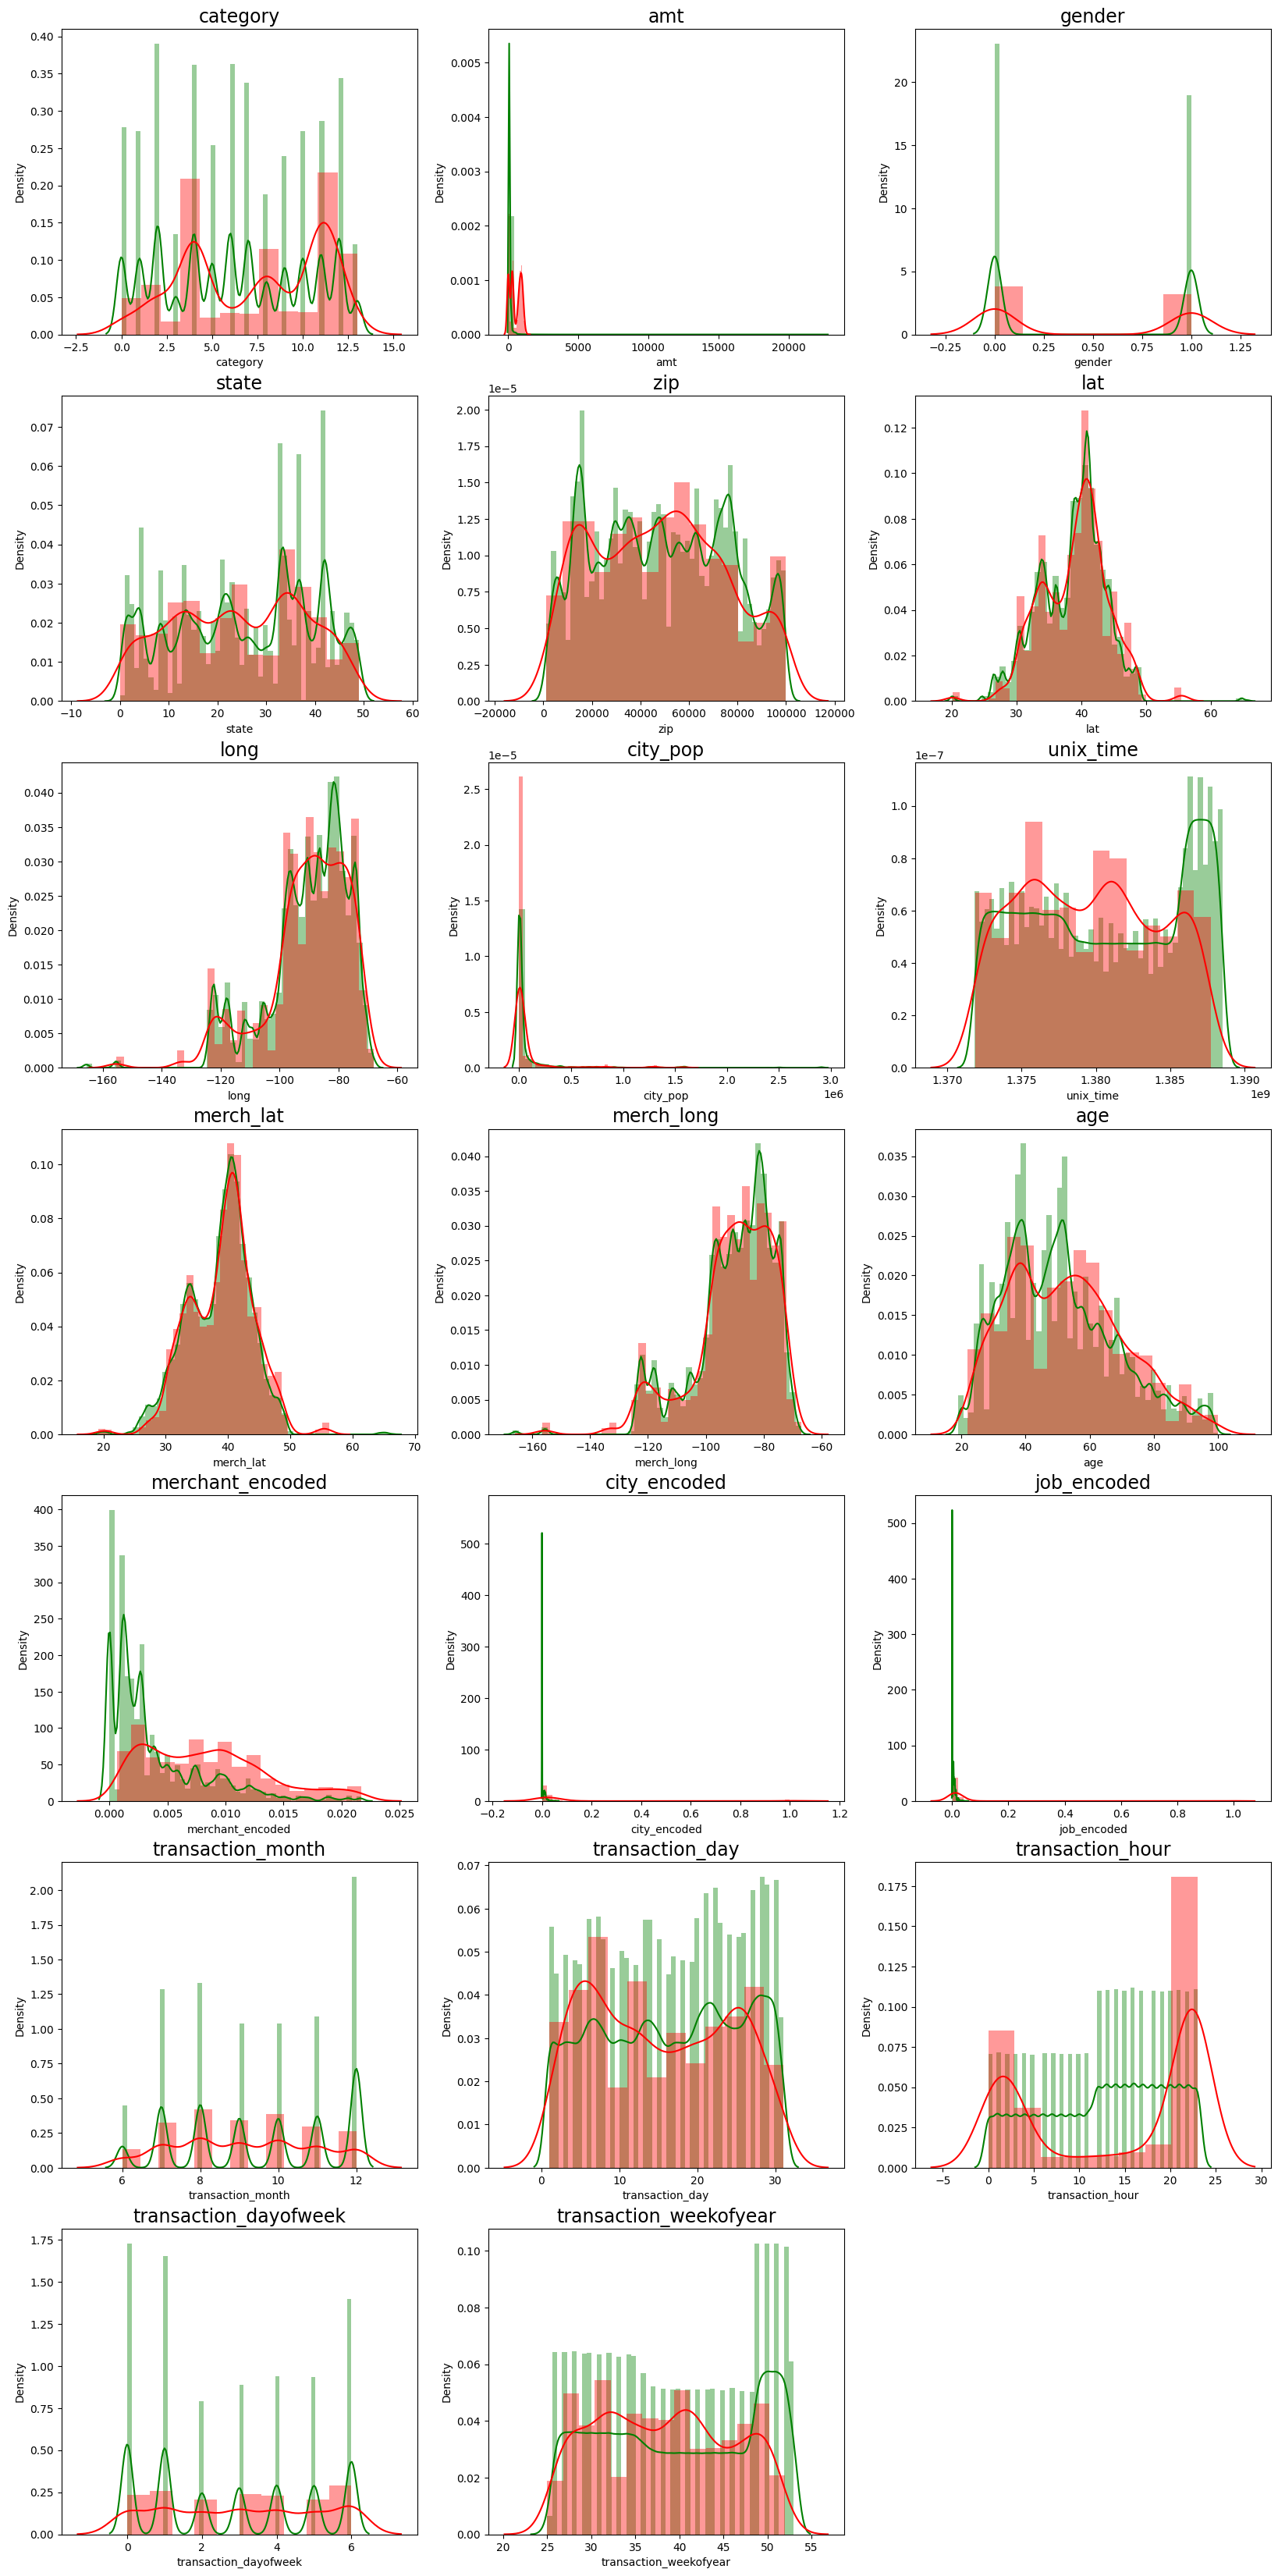

In [ ]:
# Accumulating all the column names (features) under one variable, for testing data
cols = list(X_test.columns.values)

# plot the histogram of a variable(feature) from the testing dataset to see the skewness
normal_records = df_tst.is_fraud == 0
fraud_records = df_tst.is_fraud == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test[col][normal_records], color='green')
  sns.distplot(X_test[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

#####Features Scaling (Normalization / Starndardization):

* Ensure features are scaled if needed.

In [ ]:
# from sklearn.preprocessing import StandardScaler

# cols = X_train.columns    # since all the columns are we have converted to numerical features
# scaler = StandardScaler()
# X_train[cols] = scaler.fit_transform(X_train[cols])

# cols = X_test.columns    # since all the columns are we have converted to numerical features

# X_test[cols] = scaler.fit_transform(X_test[cols])


## Some Concepts Regarding the Classification ML Model Evaluation metrics

####Confusion Matrix



*   A confusion matrix is a table that is often used to describe
the performance of a classification model (or "classifier")
on a set of test data for which the true values are known.



*   True Positives => Observation is Positive, and the model
classified it as Positive


*   False Negatives => Observation is Positive, but the model
classified it as Negative
*   False Positives => Observation is Negative, but the model
classified it as Positive


*  True Negatives => Observation is Negative, and the model
classified it as Negative



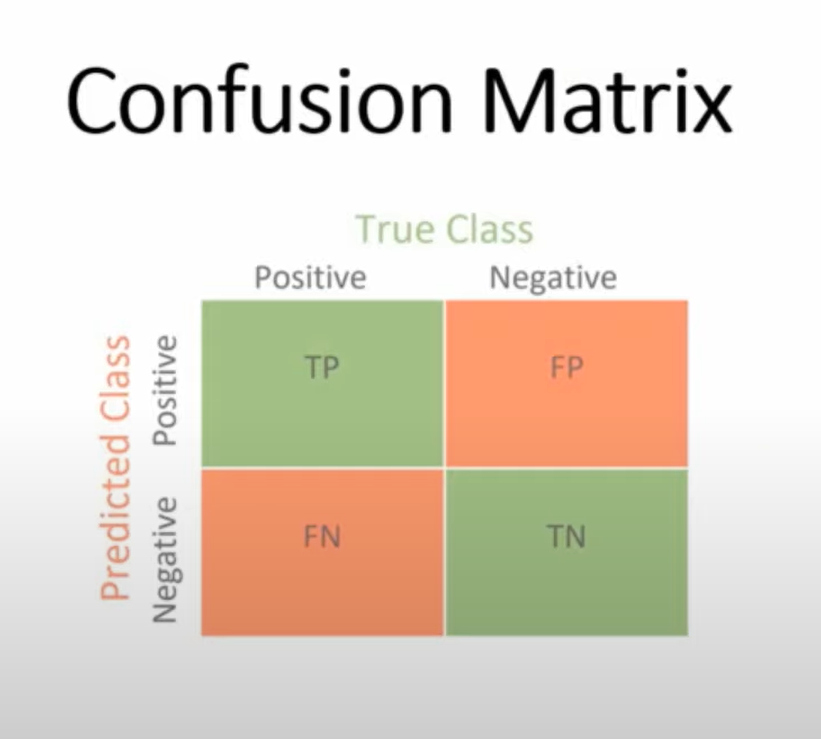


 ### Classification Report

*   A classification report is a performance evaluation metric in machine
learning. It is used to show the precision, recall, F1 Score, and
support of your trained classification model.

*   Precision tells us how many of the correctly predicted cases actually
turned out to be positive.
· Precision is given as: True Positives/(True Positives + False Positives)

*   Recall tells us how many of the actual positive cases we were able to
predict correctly with our model.
· Recall is given as: True Positives/(True Positives + False Negatives)


*   F1-score is a harmonic mean of Precision and Recall, and so it gives a
combined idea about these two metrics. It is maximum when
Precision is equal to Recall.


#### AUC-ROC


*   "Area Under the Curve" (AUC) of "Receiver Operating
Characteristic" (ROC).

*  The Receiver Operator Characteristic (ROC) curve is an
evaluation metric for binary classification problems. It is a
probability curve that plots the TPR against FPR at various
threshold values and essentially separates the 'signal'
from the 'noise'.
*   The Area Under the Curve (AUC) is the measure of the
ability of a classifier to distinguish between classes and is
used as a summary of the ROC curve.


*   The higher the AUC, the better the performance of the
model at distinguishing between the positive and negative
classes.

## Model Building

In [ ]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])


In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent', 'Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN', 'FP'], ['FN', 'TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]),fontsize=12)
  plt.show()

#### Logistic Regression:
Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [ ]:

# Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):


    # Logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    print('Max auc_roc for L1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for L2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print("Parameters for L1 regularization")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    print("Parameters for L2 regularization")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    # Find predicted values
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)

    # Find predicted probabilities
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Accuracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_test, y_pred_l2)
    Accuracy_l1 = metrics.accuracy_score(y_test, y_pred_l1)

    print("Accuracy of Logistic model with L2 regularization : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    print("Accuracy of Logistic model with L1 regularization : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("L2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("L2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Methodology': Methodology,
        'Model': 'Logistic Regression with L2 Regularization',
        'Accuracy': [Accuracy_l2],
        'roc_value': [l2_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("L1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("L1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Methodology': Methodology,
        'Model': 'Logistic Regression with L1 Regularization',
        'Accuracy': [Accuracy_l1],
        'roc_value': [l1_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results, searchCV_l2, searchCV_l1


#### KNN
The abbreviation KNN stands for "K-Nearest Neighbour". It is a supervised machine learning
algorithm. The algorithm can be used to solve both classification and regression problem statements.
The number of nearest neighbours to a new unknown variable that has to be predicted or classified is
denoted by the symbol 'K'.

In [ ]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

    #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print("model score")
    print(score)

    #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))

    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Methodology': Methodology,
        'Model': 'KNN',
        'Accuracy': [KNN_Accuracy],
        'roc_value': [knn_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)
    return df_Results, knn

#### Decision TreeClassifier:
Decision Tree is a Supervised learning technique that can be used for both classification and
Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-
structured classifier, where internal nodes represent the features of a dataset, branches represent the
decision rules and each leaf node represents the outcome.


In [ ]:
# Created a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
    #Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria = ['gini', 'entropy']
    scores = {}
    models = {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]


        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score
        models[c] = dt
        print(c +" score: {0}".format(test_score))

        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)

        print("classification Report")
        print(classification_report(y_test, y_pred))

        print(c + " tree_roc_value: {0}" .format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))


        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'. format(roc_auc))
        plt.plot(fpr,tpr, label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()

        df_Results = pd.concat([df_Results, pd.DataFrame({
            'Methodology': Methodology,
            'Model': 'Tree Model with {0} criteria'.format(c),
            'Accuracy': [scores],
            'roc_value': [tree_roc_value],
            'threshold': [threshold]
        })], ignore_index=True)

    return df_Results, models


#### Random Forest
A random forest is a machine learning technique that's used to solve regression and classification
problems. It utilizes ensemble learning, which is a technique that combines many classifiers to
provide solutions to complex problems.

In [ ]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
    #Evaluate Random Forest model

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt', random_state=42)

    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))

    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))


    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Methodology': Methodology,
        'Model': 'Random Forest',
        'Accuracy': [RF_test_score],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results,  RF_model

#### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible
and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It
provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology,X_train,y_train, X_test, y_test ):
    #Evaluate XGboost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Methodology': Methodology,
        'Model': 'XGBoost',
        'Accuracy': [XGB_test_score],
        'roc_value': [XGB_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results, XGBmodel



#### SVM
"Support Vector Machine" (SVM) is a supervised machine learning algorithm that can be used for
both classification or regression challenges. However, it is mostly used in classification problems. In
the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of
features you have) with the value of each feature being the value of a particular coordinate. Then, we
perform classification by finding the hyper-plane that differentiates the two classes very well

In [ ]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
    #Evaluate SVM model with sigmoid kernel model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Methodology': Methodology,
        'Model': 'SVM',
        'Accuracy': [SVM_Score],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results, XGBmodel



 ### Building different models on the imbalanced dataset and see the result




###Different Methodologies

####RepeatedKFold

*   Repeated K-fold is the most preferred cross-validation technique for both classification and regression
machine learning models. Shuffling and random sampling of the data set multiple times is the core
procedure of repeated K-fold algorithm and it results in making a robust model as it covers the
maximum training and testing operations.



* Repeated K-Fold Cross-Validation:

Repeated K-Fold Cross-Validation involves repeating the K-Fold Cross-Validation process multiple times with different random splits. This technique enhances the robustness of the model evaluation by covering more variations in the dataset.

* Procedure:

1. Repeat the K-Fold Cross-Validation n times.
2. For each repetition:
3. Perform K-Fold Cross-Validation.
4. Compute the average performance metric over all repetitions.

* Advantages: Provides a more robust estimate by averaging over multiple splits.

* Disadvantages: Even more computationally expensive.



####StratifiedKFold
*  This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by
preserving the percentage of samples for each class. KFold: Split dataset into k consecutive folds.


* Stratified K-Fold Cross-Validation:

Stratified K-Fold Cross-Validation ensures that each fold has the same proportion of classes as the original dataset. This is particularly useful for imbalanced datasets where preserving the class distribution is crucial.

Procedure:

* Split the dataset into k stratified folds.

For each fold:
1. Train the model on k-1 folds.
2. Validate the model on the remaining fold.
* Compute the average performance metric over the k iterations.

Advantages: Maintains class distribution across folds.

Disadvantages: Slightly more complex to implement.

In [ ]:
    X = pd.concat([X_train, X_test], ignore_index=True)
    y = pd.concat([y_train, y_test], ignore_index=True)

###Perform cross validation with RepeatedKFold


In [ ]:
X.shape, y.shape

((1852394, 20), (1852394,))

In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [      0       1       2 ... 1852389 1852390 1852393] TEST: [      7      16      22 ... 1852382 1852391 1852392]
TRAIN: [      0       2       3 ... 1852391 1852392 1852393] TEST: [      1       5      11 ... 1852370 1852371 1852383]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [      3       6      14 ... 1852385 1852388 1852390]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [      4      10      24 ... 1852375 1852381 1852389]
TRAIN: [      1       3       4 ... 1852390 1852391 1852392] TEST: [      0       2       8 ... 1852386 1852387 1852393]
TRAIN: [      0       1       2 ... 1852390 1852391 1852393] TEST: [      3      12      13 ... 1852385 1852387 1852392]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [      5      11      14 ... 1852365 1852376 1852380]
TRAIN: [      0       2       3 ... 1852391 1852392 1852393] TEST: [      1       7       8 ... 1852384 1852388 1852389]
TRAIN: [      0       1       3 

In [ ]:
X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape

((1481916, 20), (370478, 20), (1481916,), (370478,))

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_train_cv))
print(np.sum(y_test_cv))

7746
1905


In [ ]:
# #Run Logistic Regression with L1 And L2 Regularisation
# print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
# df_Results, _, _ = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*60 )

# #Run KNN Model
# print("KNN Model")
# start_time = time.time()
# df_Results, _ = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds --- "% (time.time() -start_time))
# print('-'*60 )

# #Run Decision Tree Models with 'gini' & 'entropy' criteria
# print("Decision Tree Models with 'gini' & 'entropy' criteria")
# start_time = time.time()
# df_Results, _ = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv,y_test_cv)
# print("Time Taken by Model: --- %s seconds --- "% (time.time()-start_time))
# print('-'*60 )


# #Run Random Forest Model
# print("Random Forest Model")
# start_time = time.time()
# df_Results, _ = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*60 )

# #Run XGBoost Model
# print("XGBoost Model")
# start_time = time.time()
# df_Results, _ = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*60)

# #Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results, _ = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))


XGBoost Model
Model Accuracy: 0.9991605439459293
Confusion Matrix


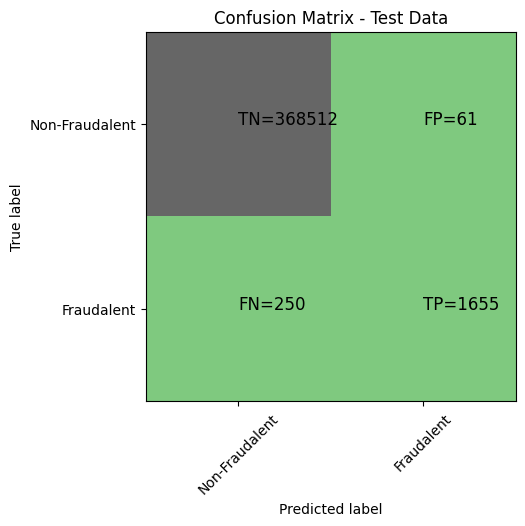

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368573
           1       0.96      0.87      0.91      1905

    accuracy                           1.00    370478
   macro avg       0.98      0.93      0.96    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.9994389562873448
XGBoost threshold: 0.004703030455857515
ROC for the test dataset 99.9%


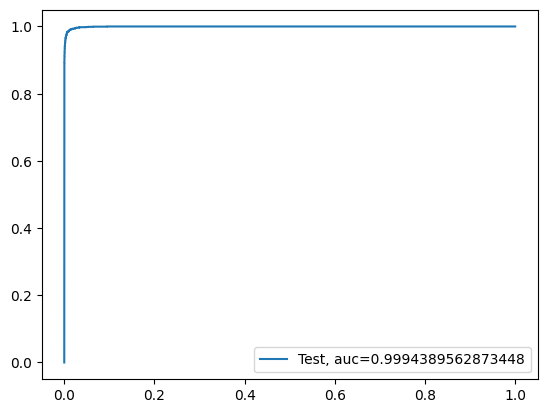

Time Taken by Model: --- 23.6556396484375 seconds --- 
------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results, XGB_rkf_cv = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60)

Random Forest Model
Model Accuracy: 0.9986989780769708
Confusion Matrix


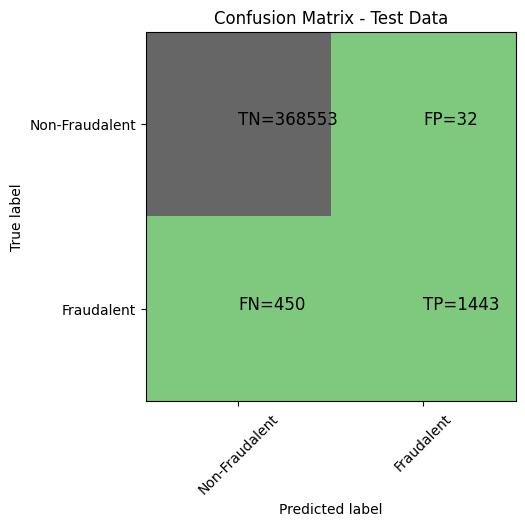

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368585
           1       0.98      0.76      0.86      1893

    accuracy                           1.00    370478
   macro avg       0.99      0.88      0.93    370478
weighted avg       1.00      1.00      1.00    370478

Random Forest roc_value: 0.9910893153791752
Random Forest threshold: 0.03
ROC for the test dataset 99.1%


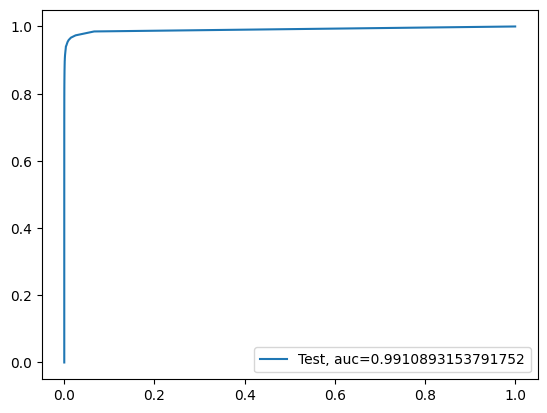

Time Taken by Model: --- 907.9602069854736 seconds --- 
------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results, _ = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9948903848541614
Confusion Matrix


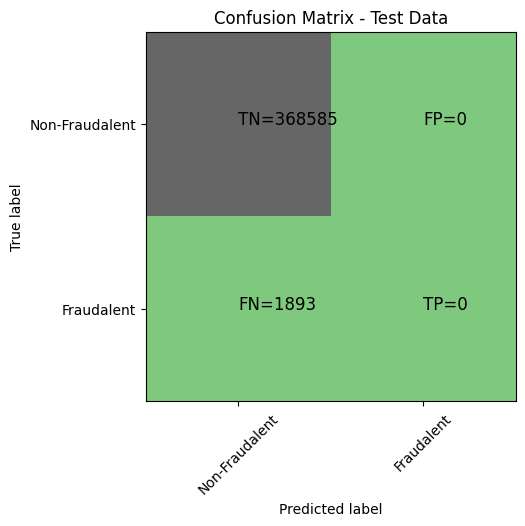

classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368585
           1       0.00      0.00      0.00      1893

    accuracy                           0.99    370478
   macro avg       0.50      0.50      0.50    370478
weighted avg       0.99      0.99      0.99    370478



In [ ]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results, _ = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))


Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9983075918138189
Confusion Matrix


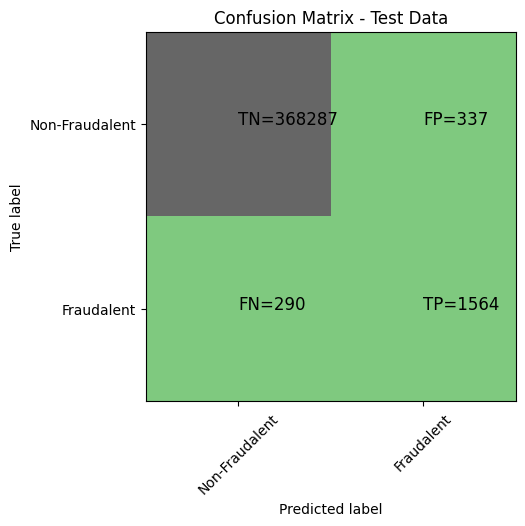

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368624
           1       0.82      0.84      0.83      1854

    accuracy                           1.00    370478
   macro avg       0.91      0.92      0.92    370478
weighted avg       1.00      1.00      1.00    370478

gini tree_roc_value: 0.9213336174184827
Tree threshold: 1.0
ROC for the test dataset 92.1%


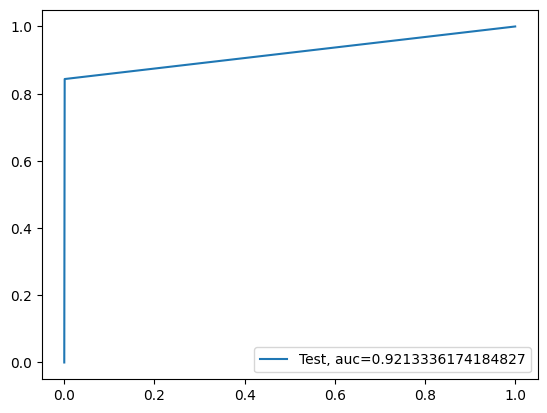

entropy score: 0.9983291855386824
Confusion Matrix


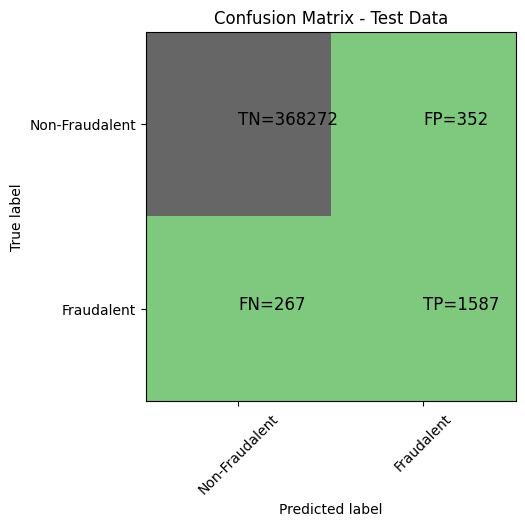

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368624
           1       0.82      0.86      0.84      1854

    accuracy                           1.00    370478
   macro avg       0.91      0.93      0.92    370478
weighted avg       1.00      1.00      1.00    370478

entropy tree_roc_value: 0.9275160762298233
Tree threshold: 1.0
ROC for the test dataset 92.8%


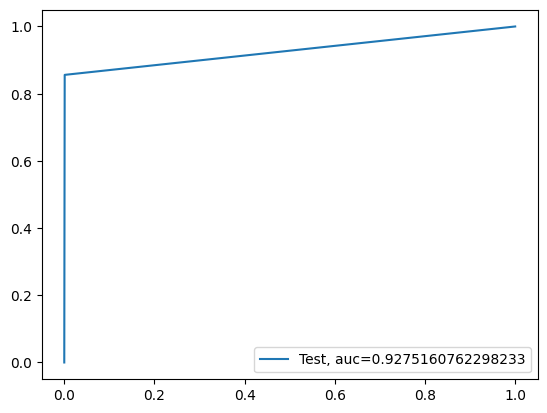

Time Taken by Model: --- 51.787376403808594 seconds --- 
------------------------------------------------------------


In [ ]:
#Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results, _ = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv,y_test_cv)
print("Time Taken by Model: --- %s seconds --- "% (time.time()-start_time))
print('-'*60 )

KNN Model
model score
0.9947338303489006
Confusion Matrix


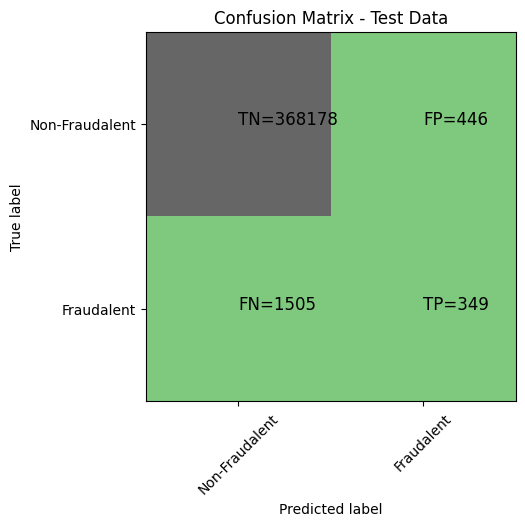

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368624
           1       0.44      0.19      0.26      1854

    accuracy                           0.99    370478
   macro avg       0.72      0.59      0.63    370478
weighted avg       0.99      0.99      0.99    370478



In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results, _ = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds --- "% (time.time() -start_time))
print('-'*60 )

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.886166204777877
Max auc_roc for L2: 0.8554351282030721
Parameters for L1 regularization
[[-1.78712491e-03  1.18329770e-03 -8.64278884e-03 -3.19350551e-04
   2.60775727e-07 -1.23780643e-03  6.62024738e-04 -1.11726389e-07
  -1.44936342e-10 -5.06032206e-02  1.04028171e-02 -9.91708017e-05
   8.41446681e+00  7.52253321e+00  6.68533997e+00 -1.24649861e-01
  -2.54585600e-03 -2.64794149e-03 -4.62884133e-03  6.09279151e-03]]
[-0.22553]
{1: array([[0.56523143, 0.53242236, 0.48746809, 0.49411437, 0.58421009,
        0.63562299, 0.74844164, 0.65882194, 0.69666461, 0.70794303,
        0.69803449, 0.70818403, 0.70150273, 0.71399872, 0.87601721,
        0.6751831 , 0.73090314, 0.79131063, 0.74407065, 0.77143248],
       [0.55832563, 0.53957061, 0.52005518, 0.52109076, 0.61436636,
        0.65381501, 0.7734876 , 0.67000065, 0.70476796, 0.7349795 ,
        0.68482531, 0.71522717, 0.71127182, 0.73237242, 0.89630713,
        0.678320

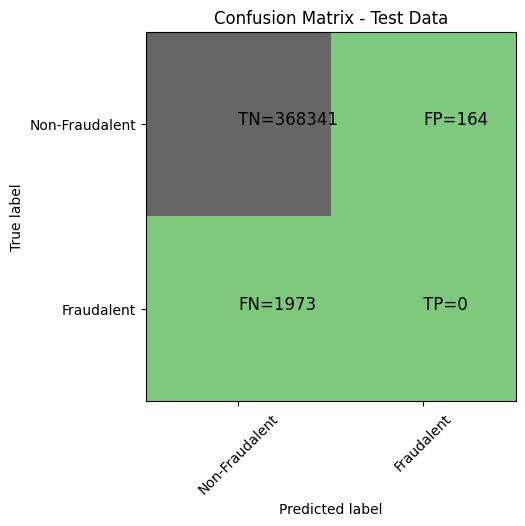

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368505
           1       0.00      0.00      0.00      1973

    accuracy                           0.99    370478
   macro avg       0.50      0.50      0.50    370478
weighted avg       0.99      0.99      0.99    370478

Accuracy of Logistic model with L1 regularization : 0.9948903848541614
Confusion Matrix


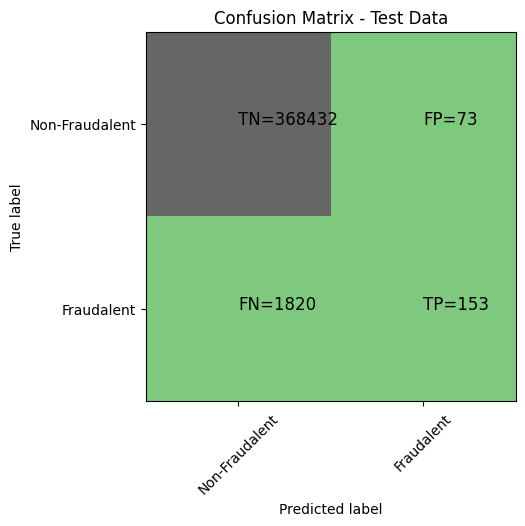

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368505
           1       0.68      0.08      0.14      1973

    accuracy                           0.99    370478
   macro avg       0.84      0.54      0.57    370478
weighted avg       0.99      0.99      0.99    370478

L2 roc_value: 0.8573202006411118
L2 threshold: 0.0065302953812698735
ROC for the test dataset 85.7%


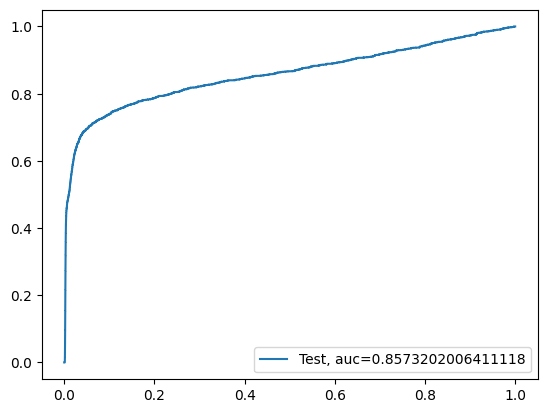

L1 roc_value: 0.827832462026726
L1 threshold: 0.030746690404078108
ROC for the test dataset 82.8%


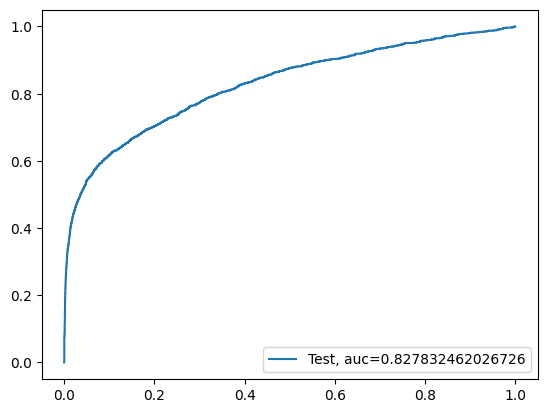

Time Taken by Model: --- 5799.442336559296 seconds --- 
------------------------------------------------------------


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results, _ = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60 )

In [ ]:
# # Checking the df_results dataframe which contains consolidated results of all the runs
# df_Results

In [ ]:
# # Using dataframe df_Results: sactter plot of accuracy vs roc value for different models

# import altair as alt
# chart = alt.Chart(df_Results).mark_circle().encode(x='Accuracy', y='roc_value', color='Model')
# chart

####Results for cross validation with RepeatedKFold:
* Looking at Accuracy and ROC value, also the Precision & Recall, we have "XGBoost" which has provided best results for cross validation with
RepeatedKFold technique.

* Random Forest Model also did best job.

* "Tree Model with gini criteria" and also "Tree Model with entropy criteria" perfomed good but not upto accepted level.

* Models like "SVM", "KNN", "Logistic Regression with L2 Regularization", and "Logistic Regression with L2 Regularization" performed terrible. So we will not utilize them in next strategies except the Logistic Regression in some strategies.

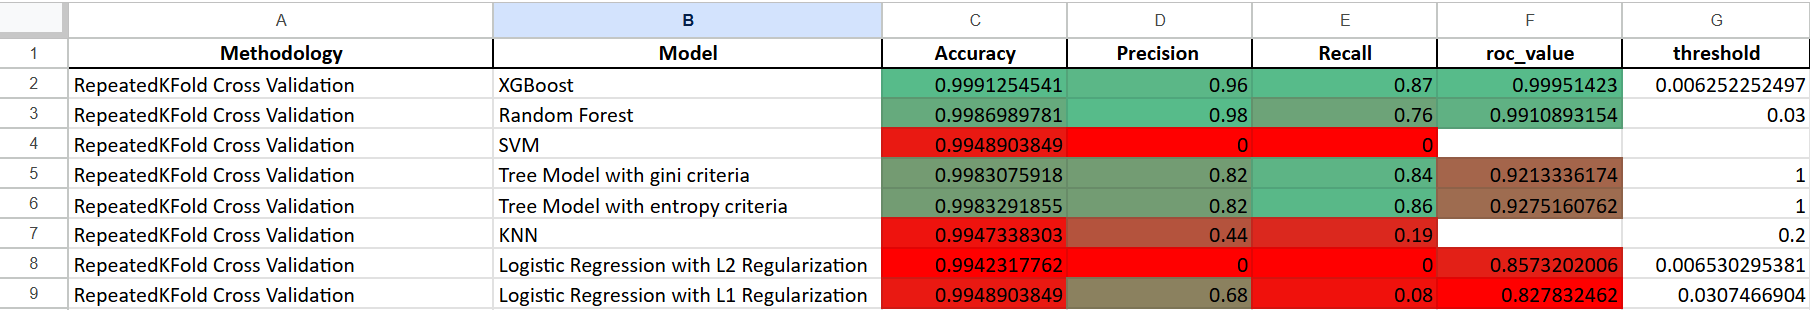

* Models like "SVM", "KNN", "Logistic Regression with L2 Regularization", and "Logistic Regression with L2 Regularization" performed terrible. So we will not utilize them in next strategies except the Logistic Regression in some strategies.

###Perform cross validation with StratifiedKFold

In [ ]:
#Lets perfrom StratifiedkFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 246494  246500  246536 ... 1852391 1852392 1852393] TEST: [     0      1      2 ... 371049 371050 371051]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [246494 246500 246536 ... 741476 741477 741478]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [ 654499  654711  654827 ... 1112045 1112046 1112047]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [1012123 1012304 1012660 ... 1482496 1482497 1482498]
TRAIN: [      0       1       2 ... 1482496 1482497 1482498] TEST: [1352137 1352672 1352944 ... 1852391 1852392 1852393]


In [ ]:
X_train_SKF_cv.shape, X_test_SKF_cv.shape, y_train_SKF_cv.shape, y_test_SKF_cv.shape

((1481916, 20), (370478, 20), (1481916,), (370478,))

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_train_SKF_cv))
print(np.sum(y_test_SKF_cv))

7721
1930


In [ ]:
# #Run Logistic Regression with L1 And L2 Regularisation
# print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
# df_Results, _, _  = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
# print("Time Taken by Model: --- %s seconds --- "% (time.time() - start_time))
# print('-'*60 )

# #Run KNN ModeL
# print("KNN Model")
# start_time = time.time()
# df_Results, _ = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
# print("Time Taken by Model: --- %s seconds --- "% (time.time() - start_time))
# print('-'*60 )

# #Run Decision Tree Models with 'gini' & 'entropy' criteria
# print("Decision Tree Models with 'gini' & 'entropy' criteria")
# start_time = time.time()
# df_Results, _ = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
# print("Time Taken by Model: --- %s seconds --- "% (time.time()-start_time))
# print('-'*60 )

# #Run Random Forest Model
# print("Random Forest Model")
# start_time = time.time()
# df_Results, _ = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print("-"*60 )

# #Run XGBoost Modela
# print("XGBoost Model")
# start_time = time.time()
# df_Results, _ = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*60 )

# #Run SVM Model with Sigmaid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results, _ = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv,y_test_SKF_cv)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))

For this strategy, We will only train models "Random Forest", "XGBoost", and "Logistic Regression with L1 And L2 Regularization".

Random Forest Model
Model Accuracy: 0.9965207110813598
Confusion Matrix


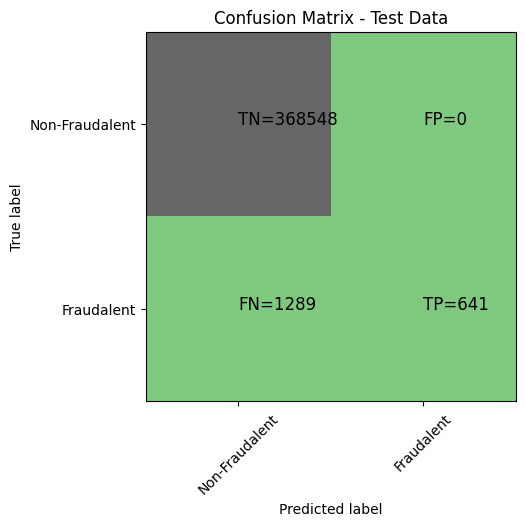

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       1.00      0.33      0.50      1930

    accuracy                           1.00    370478
   macro avg       1.00      0.67      0.75    370478
weighted avg       1.00      1.00      1.00    370478

Random Forest roc_value: 0.9740654650562316
Random Forest threshold: 0.02
ROC for the test dataset 97.4%


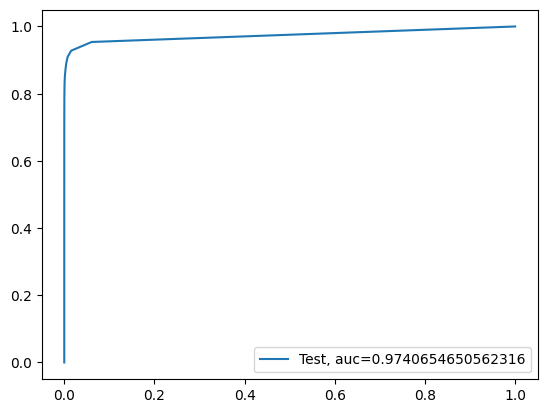

Time Taken by Model: --- 667.9160566329956 seconds --- 
------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results, _ = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print("-"*60 )

XGBoost Model
Model Accuracy: 0.9963911487321784
Confusion Matrix


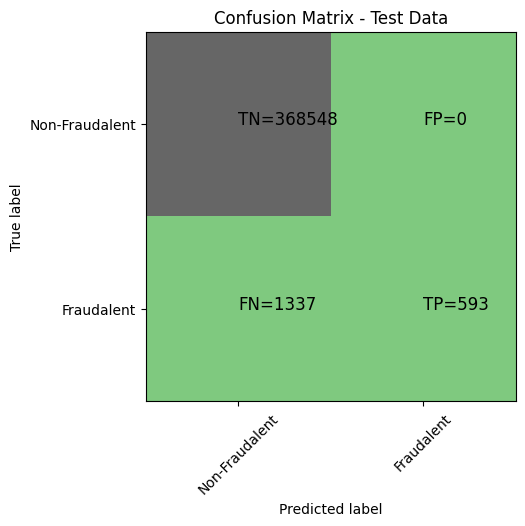

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       1.00      0.31      0.47      1930

    accuracy                           1.00    370478
   macro avg       1.00      0.65      0.73    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.999122980360233
XGBoost threshold: 4.1850595152936876e-05
ROC for the test dataset 99.9%


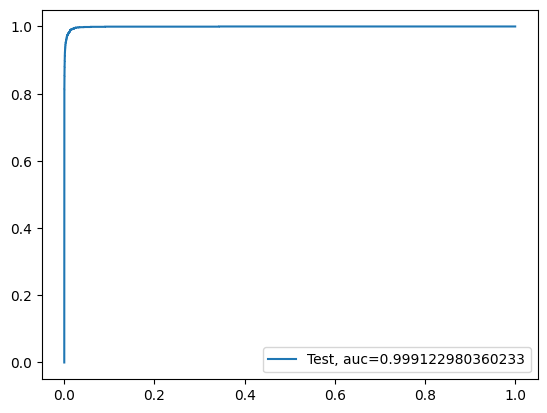

Time Taken by Model: --- 25.75316333770752 seconds --- 
------------------------------------------------------------


In [ ]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results, XGB_skf_cv = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60 )

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.8747802418320418
Max auc_roc for L2: 0.8547418310992494
Parameters for L1 regularization
[[-2.34518364e-03  1.21663141e-03 -8.18748828e-03 -2.02232041e-04
   1.49718376e-07 -1.27202037e-03  6.48577595e-04 -1.02334844e-07
  -1.65906574e-10 -5.06823691e-02  1.04020945e-02 -6.67103006e-05
   9.99230494e+00  6.81331785e+00  7.02694583e+00 -1.38337110e-01
  -2.53326601e-03 -2.64775407e-03 -5.63048440e-03  7.45173021e-03]]
[-0.23767717]
{1: array([[0.55762336, 0.53625879, 0.51666221, 0.52109381, 0.61578425,
        0.62328121, 0.75562008, 0.65091881, 0.67503072, 0.71208555,
        0.66098319, 0.70958652, 0.70996584, 0.70358435, 0.88222325,
        0.65659385, 0.73560608, 0.77893916, 0.7332467 , 0.77112126],
       [0.5630974 , 0.55177664, 0.50234886, 0.50307096, 0.60092852,
        0.63986622, 0.75192143, 0.65988636, 0.68331105, 0.72938855,
        0.68950072, 0.71812493, 0.71390069, 0.71382438, 0.86995329,
        0.66

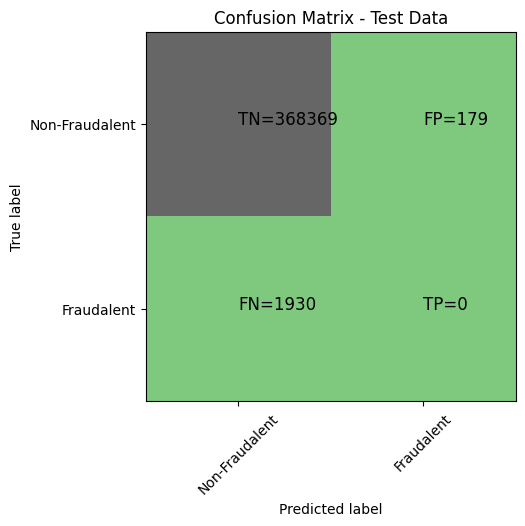

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368548
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370478
   macro avg       0.50      0.50      0.50    370478
weighted avg       0.99      0.99      0.99    370478

Accuracy of Logistic model with L1 regularization : 0.9948876856385535
Confusion Matrix


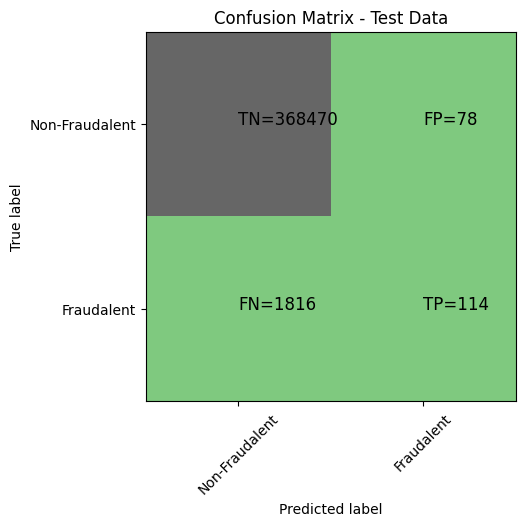

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       0.59      0.06      0.11      1930

    accuracy                           0.99    370478
   macro avg       0.79      0.53      0.55    370478
weighted avg       0.99      0.99      0.99    370478

L2 roc_value: 0.8650525594320824
L2 threshold: 0.004657159494334634
ROC for the test dataset 86.5%


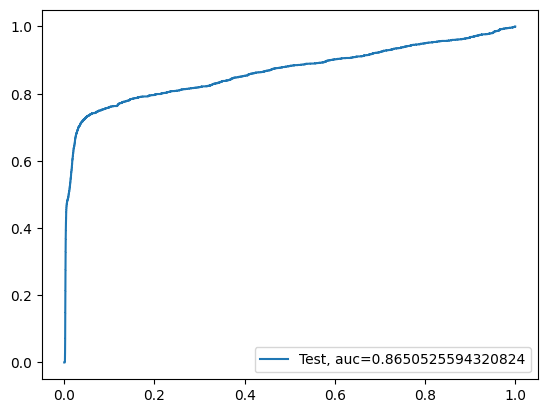

L1 roc_value: 0.8976268387450295
L1 threshold: 0.01604822480308346
ROC for the test dataset 89.8%


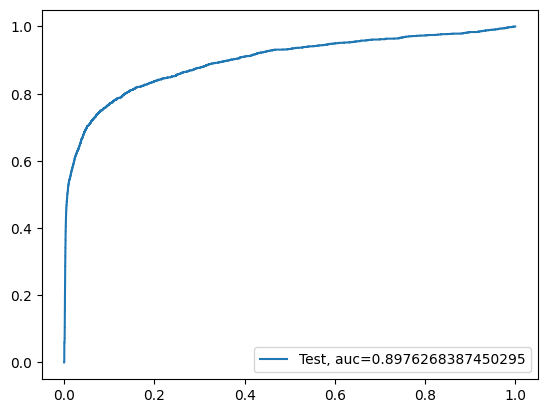

Time Taken by Model: --- 6909.7336602211 seconds --- 
------------------------------------------------------------


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results, _ = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds --- "% (time.time() - start_time))
print('-'*60 )

In [ ]:
# # Checking the df_results dataframe wich contains consolidated results of all the runs
# df_Results

In [ ]:
# # Using dataframe df_Results: sactter plot of accuracy vs roc value for different models

# import altair as alt
# chart = alt.Chart(df_Results).mark_circle().encode(x='Accuracy', y='roc_value', color='Model')
# chart


####Results for cross validation with StratifiedKFold:
* Looking at Accuracy and ROC value, also the Precision & Recall, we have "XGBoost" which has provided best results for cross validation with
RepeatedKFold technique.

* Random Forest also did best job.

* Models "Logistic Regression with L2 Regularization", and "Logistic Regression with L2 Regularization" performed terrible. So we will not utilize them in next strategies.

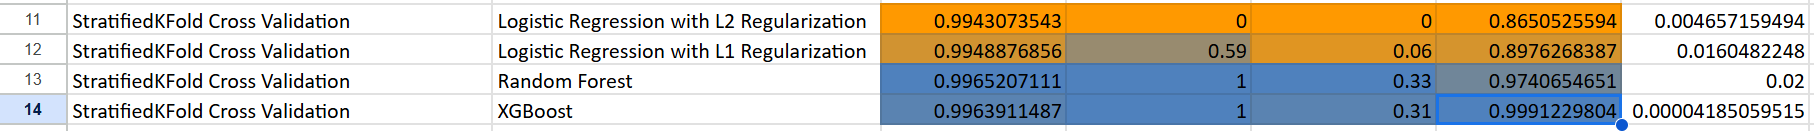

###Conclusion for RepeatedKFold & StratifiedKFold cross validation :
As the results show "XGBoost" for both provided best results.

####Proceed with the model which shows the best result


*   Apply the best hyperparameter on the model
*   Predict on the test dataset



###Hyperparameter Tunning on XGBoost with RepeatedKFold Cross Validation


In [ ]:
X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape

((1481916, 20), (370478, 20), (1481916,), (370478,))

In [ ]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1,max_delta_step=0,
                missing=None, n_jobs = -1,
                nthread=None, objective='binary:logistic', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, verbosity=1),
                param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs = -1, cv=5)

gsearch1.fit(X_train_cv,y_train_cv)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([31.0983427 , 27.44830999, 33.85083518, 22.83103304, 30.79523549]),
  'std_fit_time': array([3.59303251, 3.20007991, 3.70546609, 0.98997202, 4.01864023]),
  'mean_score_time': array([0.06093216, 0.1130301 , 0.10453234, 0.05355387, 0.10136585]),
  'std_score_time': array([0.03146528, 0.03646143, 0.0583088 , 0.02449405, 0.03980528]),
  'param_subsample': masked_array(data=[0.8, 0.9, 0.7, 0.7, 0.9],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 5, 1, 1, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[5, 5, 7, 5, 5],
               mask=[False, False, False, False, False],
  

In [ ]:
# print(gsearch1.cv_results_)
print('-'*80)
print(gsearch1.best_params_)
print('-'*80)
print(gsearch1.best_score_)

--------------------------------------------------------------------------------
{'subsample': 0.8, 'n_estimators': 60, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.7}
--------------------------------------------------------------------------------
nan


Model Accuracy: 0.9989742980689812
Confusion Matrix


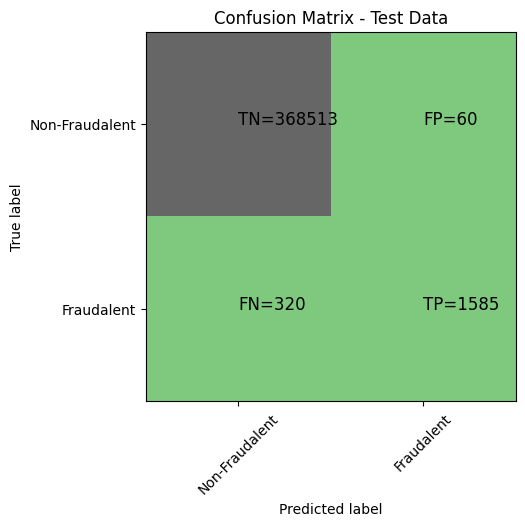

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368573
           1       0.96      0.83      0.89      1905

    accuracy                           1.00    370478
   macro avg       0.98      0.92      0.95    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.9987003489865891
XGBoost threshold: 0.003739761421456933
ROC for the test (test_RPKF_cv) dataset 99.9%


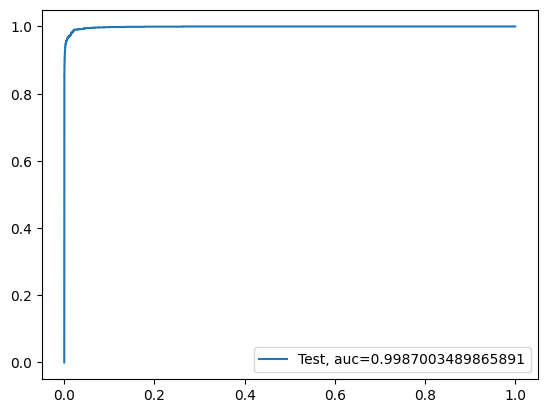

In [ ]:
# Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=np.nan, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

# fit on the dataset
clf.fit(X_train_cv,y_train_cv)

y_pred = clf.predict(X_test_cv)

XGB_test_score = clf.score(X_test_cv, y_test_cv)
print('Model Accuracy: {0}'.format(XGB_test_score))

print("Confusion Matrix")
Plot_confusion_matrix(y_test_cv, y_pred)
print("classification Report")
print(classification_report(y_test_cv, y_pred))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test_cv)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test_cv, XGB_probs)
print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test (test_RPKF_cv) dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Checking for the importance of features (say Weightage values)
clf.feature_importances_

array([0.17562398, 0.17214115, 0.04890431, 0.01213012, 0.01286407,
       0.01171892, 0.01067859, 0.02632479, 0.01723518, 0.01313713,
       0.01047065, 0.08331794, 0.05066262, 0.10442515, 0.0247553 ,
       0.01320532, 0.0136727 , 0.16735065, 0.01669826, 0.01468324],
      dtype=float32)

In [ ]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-1])])
print('2nd Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-2])])
print('3rd Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-3])])

Top var = category
2nd Top var = amt
3rd Top var = transaction_hour


In [ ]:
# Creating a dataframe with the Importance of Features (say Weightage values)
imp_features = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.feature_importances_))], axis = 1)
imp_features.columns = ['Feature', 'Importance of Features (say Weightage Values)']

In [ ]:
imp_features

Feature  Importance of Features (say Weightage Values)
0                 category                                       0.175624
1                      amt                                       0.172141
2                   gender                                       0.048904
3                    state                                       0.012130
4                      zip                                       0.012864
5                      lat                                       0.011719
6                     long                                       0.010679
7                 city_pop                                       0.026325
8                unix_time                                       0.017235
9                merch_lat                                       0.013137
10              merch_long                                       0.010471
11                     age                                       0.083318
12        merchant_encoded                                       0.050663
13            city_encoded                                       0.104425
14             job_encoded                                       0.024755
15       transaction_month                                       0.013205
16         transaction_day                                       0.013673
17        transaction_hour                                       0.167351
18   transaction_dayofweek                                       0.016698
19  transaction_weekofyear                                       0.014683

####Important features of the best model to understand the dataset

* It will tell us the weightage of the features of the dataset to take the decisions

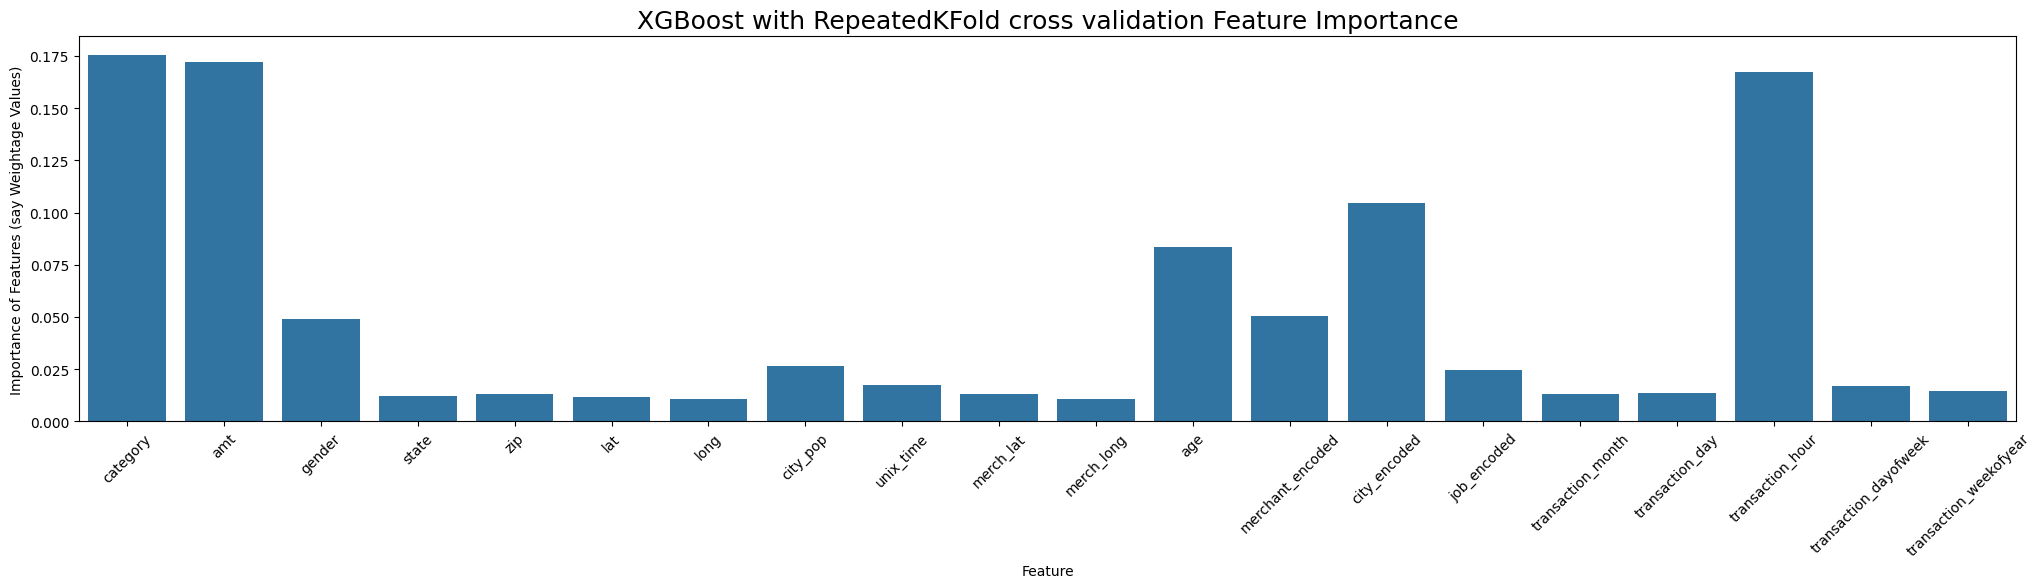

In [ ]:
# Plotting the coefficient values
plt.figure(figsize=(25,5))
sns.barplot(x='Feature', y='Importance of Features (say Weightage Values)', data=imp_features)
plt.title("XGBoost with RepeatedKFold cross validation Feature Importance", fontsize=18)
plt.xticks(rotation=45)

plt.show()

###Hyperparameter Tunning on XGBoost with StratifiedKFold Cross Validation


In [ ]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1,max_delta_step=0,
                missing=None, n_jobs = -1,
                nthread=None, objective='binary:logistic', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, verbosity=1),
                param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs = -1, cv=5)

gsearch1.fit(X_train_SKF_cv,y_train_SKF_cv)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([29.42253304, 30.07281961, 25.60914555, 33.81883731, 26.1029355 ]),
  'std_fit_time': array([2.31256284, 1.50277291, 1.3884407 , 1.29244653, 4.557765  ]),
  'mean_score_time': array([0.09023829, 0.08187718, 0.08149776, 0.08718829, 0.06938548]),
  'std_score_time': array([0.04390125, 0.03121401, 0.05029603, 0.0205232 , 0.03145652]),
  'param_subsample': masked_array(data=[0.7, 0.9, 0.9, 0.7, 0.7],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[3, 3, 3, 5, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[9, 5, 3, 7, 5],
               mask=[False, False, False, False, False],
  

In [ ]:
# print(gsearch1.cv_results_)
print('-'*80)
print(gsearch1.best_params_)
print('-'*80)
print(gsearch1.best_score_)

--------------------------------------------------------------------------------
{'subsample': 0.7, 'n_estimators': 60, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.8}
--------------------------------------------------------------------------------
nan


Model Accuracy: 0.9977488541829744
Confusion Matrix


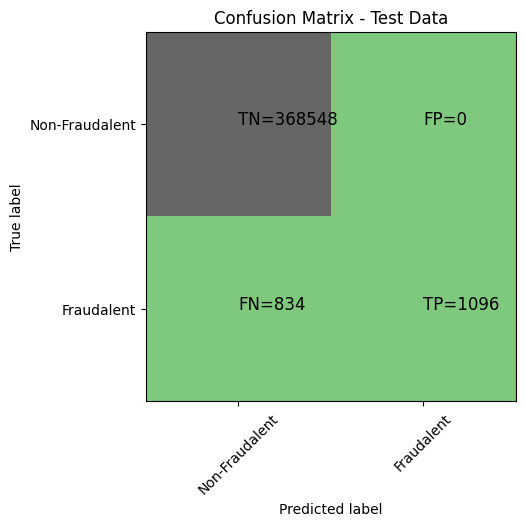

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       1.00      0.57      0.72      1930

    accuracy                           1.00    370478
   macro avg       1.00      0.78      0.86    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.9992604382885342
XGBoost threshold: 0.0012175170704722404
ROC for the test (test_SKF_cv) dataset 99.9%


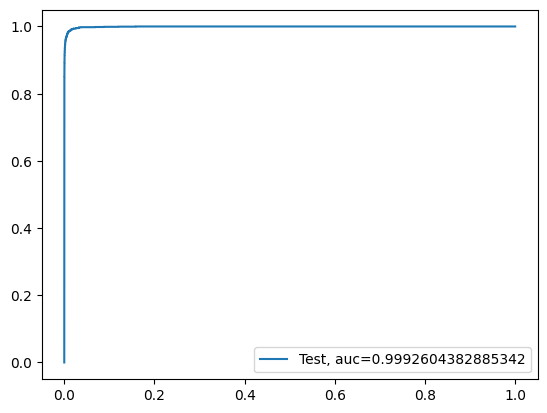

In [ ]:
# Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=np.nan, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

# fit on the dataset
clf.fit(X_train_SKF_cv, y_train_SKF_cv )

y_pred = clf.predict(X_test_SKF_cv)

XGB_test_score = clf.score(X_test_SKF_cv, y_test_SKF_cv)
print('Model Accuracy: {0}'.format(XGB_test_score))

print("Confusion Matrix")
Plot_confusion_matrix(y_test_SKF_cv, y_pred)
print("classification Report")
print(classification_report(y_test_SKF_cv, y_pred))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test_SKF_cv)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test_SKF_cv, XGB_probs)
print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test_SKF_cv, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test (test_SKF_cv) dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Checking for the importance of features (say Weightage values)
clf.feature_importances_

array([0.18322144, 0.18285607, 0.04806465, 0.01138811, 0.01176548,
       0.01262106, 0.01109352, 0.02476831, 0.0172105 , 0.01248661,
       0.01170058, 0.07924547, 0.06241852, 0.0849349 , 0.02374038,
       0.01264809, 0.01481863, 0.16655582, 0.01313152, 0.01533036],
      dtype=float32)

In [ ]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-1])])
print('2nd Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-2])])
print('3rd Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-3])])

Top var = category
2nd Top var = amt
3rd Top var = transaction_hour


In [ ]:
# Creating a dataframe with the Importance of Features (say Weightage values)
imp_features = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.feature_importances_))], axis = 1)
imp_features.columns = ['Feature', 'Importance of Features (say Weightage Values)']

In [ ]:
imp_features

Feature  Importance of Features (say Weightage Values)
0                 category                                       0.183221
1                      amt                                       0.182856
2                   gender                                       0.048065
3                    state                                       0.011388
4                      zip                                       0.011765
5                      lat                                       0.012621
6                     long                                       0.011094
7                 city_pop                                       0.024768
8                unix_time                                       0.017211
9                merch_lat                                       0.012487
10              merch_long                                       0.011701
11                     age                                       0.079245
12        merchant_encoded                                       0.062419
13            city_encoded                                       0.084935
14             job_encoded                                       0.023740
15       transaction_month                                       0.012648
16         transaction_day                                       0.014819
17        transaction_hour                                       0.166556
18   transaction_dayofweek                                       0.013132
19  transaction_weekofyear                                       0.015330

####Important features of the best model to understand the dataset

* It will tell us the weightage of the features of the dataset to take the decisions

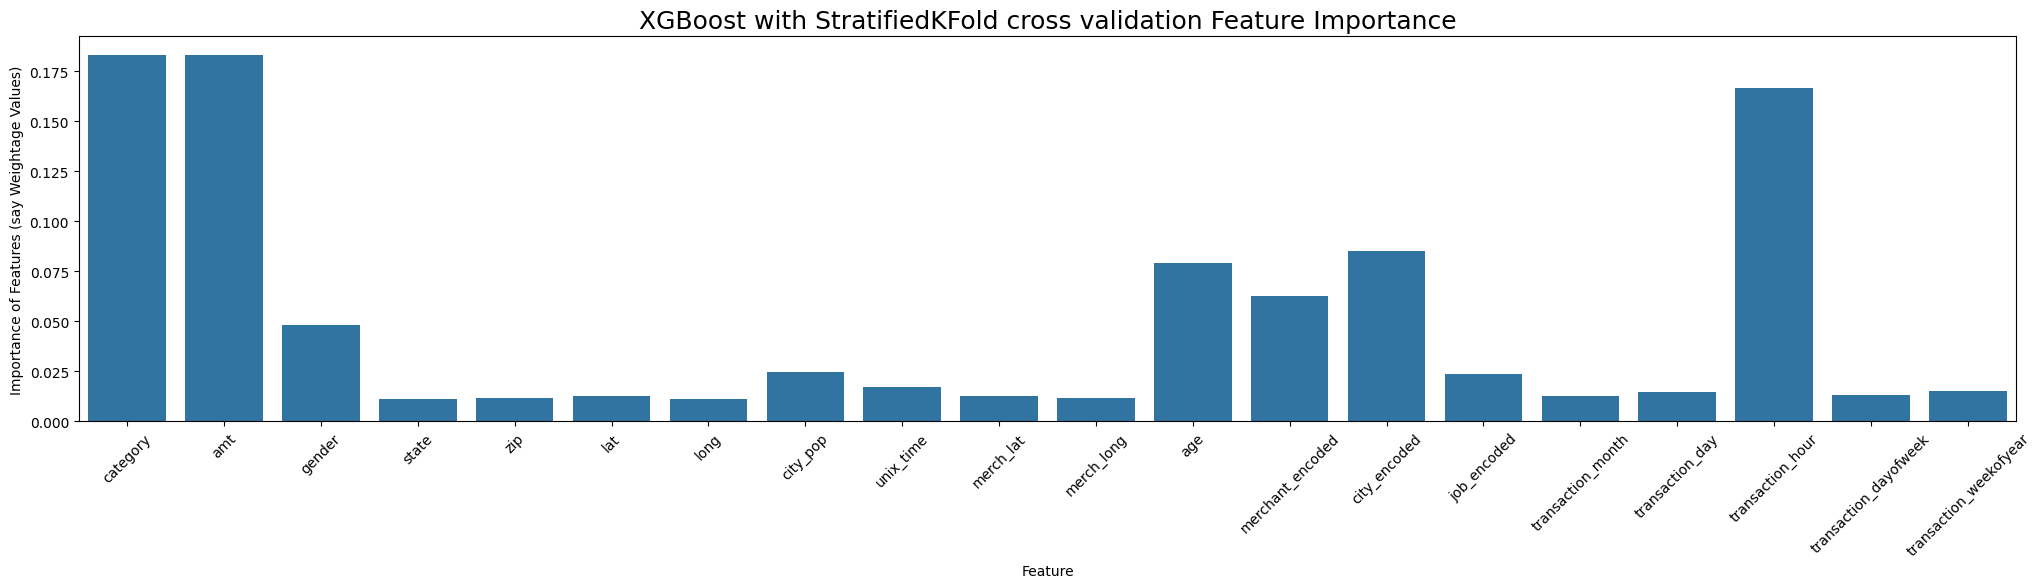

In [ ]:
# Plotting the coefficient values
plt.figure(figsize=(25,5))
sns.barplot(x='Feature', y='Importance of Features (say Weightage Values)', data=imp_features)
plt.title("XGBoost with StratifiedKFold cross validation Feature Importance", fontsize=18)
plt.xticks(rotation=45)

plt.show()

In [ ]:
X.columns

Index(['category', 'amt', 'gender', 'state', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'age', 'merchant_encoded',
       'city_encoded', 'job_encoded', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_dayofweek', 'transaction_weekofyear'],
      dtype='object')

#####Hence, it implies that features "category", "amt"(means transaction amount), "transaction_hour", "age", "gender", "merchant_encoded", and "city_encoded" have significant impact on the predictions of the fraud and genuine transactions.

##### Selecting Our Model
The final model used which had the best scores across all metrics

In [ ]:
# import joblib
# joblib.dump(rfc, "credit_fraud.pkl")

###Model building with balancing Classes

#### Perform class balancing with :


*   Random Oversampling
*   SMOTE
*   ADASYN


####Random Oversampler
Random oversampling involves randomly selecting examples from the minority class, with
replacement, and adding them to the training dataset.

####SMOTE
SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for
increasing the number of cases in your dataset in a balanced way. The module works by generating
new instances from existing minority cases that you supply as input. This method generates synthetic
data based on the feature space similarities between existing minority instances. In order to create a
synthetic instance, it finds the K-nearest neighbors of each minority instance, randomly selects one of
them, and then calculate linear interpolations to produce a new minority instance in the
neighborhood.

####ADASYN
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest
advantages are not copying the same minority data, and generating more data for "harder to learn"
examples.

##Random Oversampler

###Oversampling with RandomOverSampler with RepeatedKFold Cross Validation

*   We will use Random Oversampling method to handle the class imbalance


In [ ]:
# Creating the dataset with RandomOverSampler and RepeatedKFold
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import RandomOverSampler

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

for fold, (train_index, test_index) in enumerate(rkf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_rkf_over, y_rkf_over = ROS.fit_resample(X_train, y_train)

X_rkf_over = pd.DataFrame(data=X_rkf_over, columns=X.columns)

In [ ]:
X_rkf_over.shape, y_rkf_over.shape, X_test.shape, y_test.shape

((2211280, 20), (2211280,), (370478, 20), (370478,))

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_rkf_over))
print(np.sum(y_test))

737093
1922


In [ ]:
Data_Imbalance_Handiling = "Random Oversampling with RepeatedKFold CV"

XGBoost Model
Model Accuracy: 0.9969336910693752
Confusion Matrix


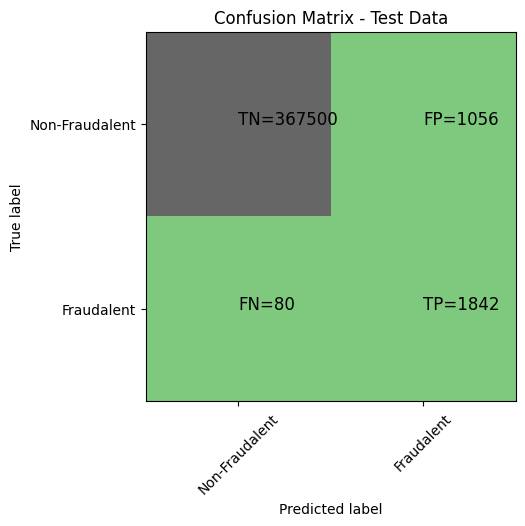

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368556
           1       0.64      0.96      0.76      1922

    accuracy                           1.00    370478
   macro avg       0.82      0.98      0.88    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.9992535327483714
XGBoost threshold: 0.0772724375128746
ROC for the test dataset 99.9%


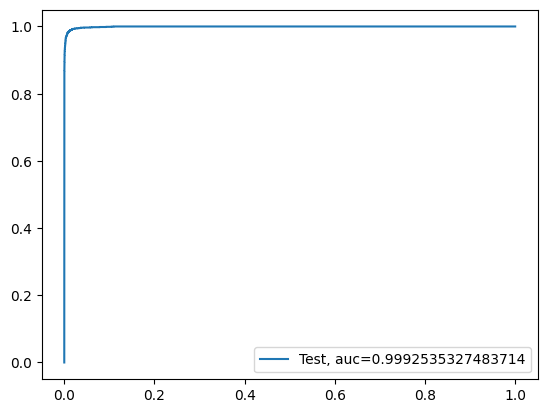

Time Taked by Model: --- 41.2823543548584 seconds --- 
------------------------------------------------------------


In [ ]:
#Run XGBoost ModeL
print("XGBoost Model")
start_time = time.time()
df_Results, XGB_ros_rkf_cv = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling, X_rkf_over, y_rkf_over, X_test, y_test)
print("Time Taked by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60 )

###Oversampling with RandomOverSampler with StratifiedKFold Cross Validation

*   We will use Random Oversampling method to handle the class imbalance


In [ ]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns=X.columns)

In [ ]:
X_over.shape, y_over.shape, X_test.shape, y_test.shape

((2211292, 20), (2211292,), (370478, 20), (370478,))

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_over))
print(np.sum(y_test))

737097
1930


In [ ]:
Data_Imbalance_Handiling = "Random Oversampling with StratifiedKFold CV "

In [ ]:
# #Run Logistic Regression with L1 And L2 Regularisation
# print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
# df_Results, _, _ = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*60 )

# #Run KNN Model
# print("KNN Model")
# start_time = time.time()
# df_Results, _ = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- "% (time.time() - start_time))
# print('-'*60 )

# #Run Decision Tree Models with 'gini' & 'entropy' criteria
# print("Decision Tree Models with 'gini' & 'entropy' criteria")
# start_time = time.time()
# df_Results, _ = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- "% (time.time()- start_time))
# print('-'*60 )

# #Run Random Forest ModeL
# print("Random Forest Model")
# start_time = time.time()
# df_Results, _ = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*60 )

# #Run XGBoost ModeL
# print("XGBoost Model")
# start_time = time.time()
# df_Results, _ = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
# print("Time Taked by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*60 )


We will only be training Models "Random Forest" and "XGBoost", Because as observed in the previous methodologies, rest all are not good in 'evauluation metrics' and 'very slow(computationally expensive)' as well

XGBoost Model
Model Accuracy: 0.9970713510653804
Confusion Matrix


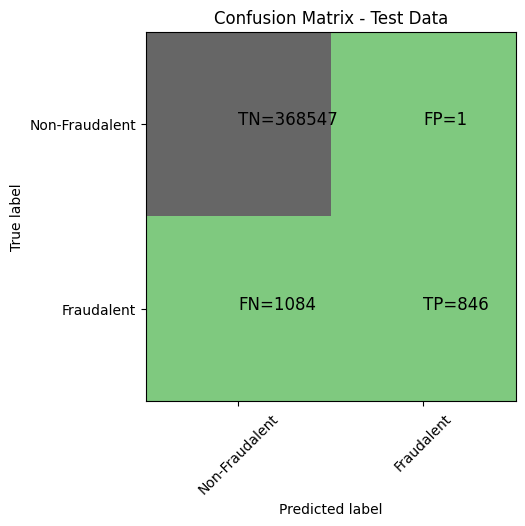

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       1.00      0.44      0.61      1930

    accuracy                           1.00    370478
   macro avg       1.00      0.72      0.80    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.9991355489384163
XGBoost threshold: 0.00021785743592772633
ROC for the test dataset 99.9%


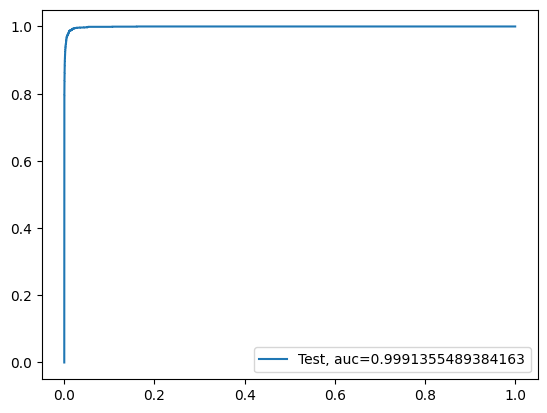

Time Taked by Model: --- 36.85022521018982 seconds --- 
------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results, XGB_ros_skf_cv = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taked by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60 )

Random Forest Model
Model Accuracy: 0.9947905138766674
Confusion Matrix


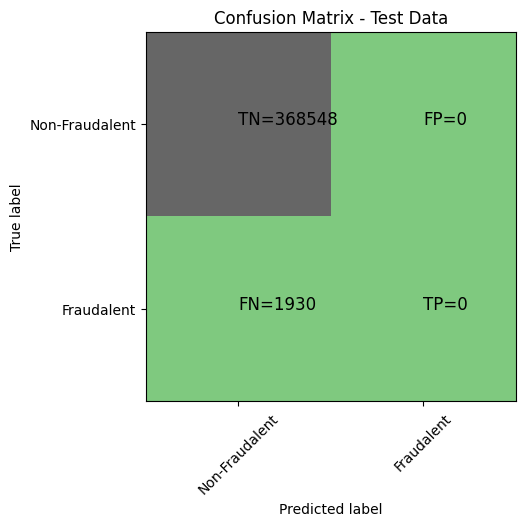

classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368548
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370478
   macro avg       0.50      0.50      0.50    370478
weighted avg       0.99      0.99      0.99    370478

Random Forest roc_value: 0.9676725083749751
Random Forest threshold: 0.01
ROC for the test dataset 96.8%


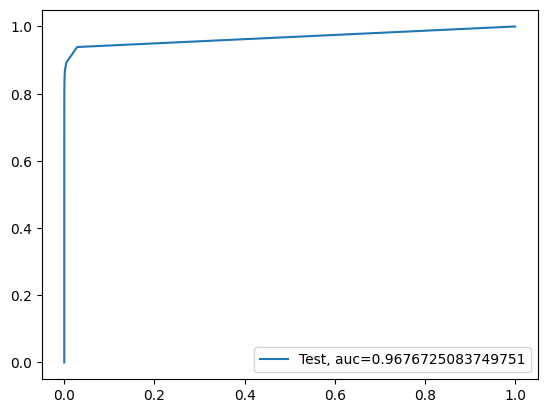

Time Taken by Model: --- 758.0949356555939 seconds --- 
------------------------------------------------------------


In [ ]:
#Run Random Forest ModeL
print("Random Forest Model")
start_time = time.time()
df_Results, _ = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60 )

In [ ]:
# # Checking the df_result dataframe which contains consolidated results of all the runs
# df_Results

In [ ]:
# # Using dataframe df_Results: sactter plot of accuracy vs roc value for different models

# import altair as alt
# chart = alt.Chart(df_Results).mark_circle().encode(x='Accuracy', y='roc_value', color='Model')
# chart


####Results for Random Oversampling:
Among both RepeatedKFold & StratifiedKFold techniques, Looking at the 'Accuracy' and 'ROC value', along with the 'precision' and 'recall' we have good results in Random Oversampling with RepeatedKFold technique for "XGBoost"



*   Random Oversampling with RepeatedKFold technique for "XGBoost" given best recall value 0.96 but precision 0.64.





##SMOTE Oversampling

###Oversampling with SMOTE Oversampling

*   We will use SMOTE Oversampling method to handle the class imbalance

In [ ]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   category                int64  
 1   amt                     float64
 2   gender                  int64  
 3   state                   int64  
 4   zip                     int64  
 5   lat                     float64
 6   long                    float64
 7   city_pop                int64  
 8   unix_time               int64  
 9   merch_lat               float64
 10  merch_long              float64
 11  age                     int64  
 12  merchant_encoded        float64
 13  city_encoded            float64
 14  job_encoded             float64
 15  transaction_month       int32  
 16  transaction_day         int32  
 17  transaction_hour        int32  
 18  transaction_dayofweek   int32  
 19  transaction_weekofyear  UInt32 
dtypes: UInt32(1), float64(8), int32(4), int64(7)
memory usage: 249.1 MB


(None, None)

###Oversampling with SMOTE Oversampling with RepeatedKFold Cross Validation

*   We will use SMOTE Oversampling method to handle the class imbalance


In [ ]:
# Creating the dataset with SMOTE Oversampling and RepeatedKFold
from sklearn.model_selection import RepeatedKFold
from imblearn import over_sampling

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

for fold, (train_index, test_index) in enumerate(rkf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    X_train = X_train.astype('float64') # Fix the data type of y_train
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_rkf_Smote, y_train_rkf_Smote= SMOTE.fit_resample(X_train, y_train)

X_train_rkf_Smote = pd.DataFrame(data=X_train_rkf_Smote, columns=X.columns)

In [ ]:
X_train_rkf_Smote.shape, y_train_rkf_Smote.shape, X_test.shape, y_test.shape

((2948616, 20), (2948616,), (370478, 20), (370478,))

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_train_rkf_Smote))
print(np.sum(y_test))

1474308
2043


In [ ]:
Data_Imbalance_Handiling = "SMOTE Oversampling with RepeatedKFold CV"

XGBoost Model
Model Accuracy: 0.9982509082860521
Confusion Matrix


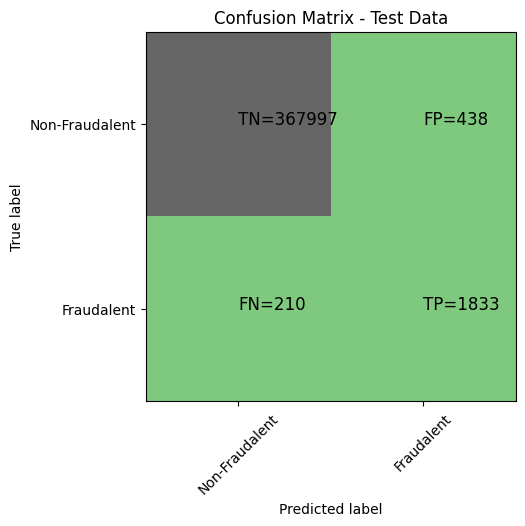

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368435
           1       0.81      0.90      0.85      2043

    accuracy                           1.00    370478
   macro avg       0.90      0.95      0.92    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.9979603067813237
XGBoost threshold: 0.055273640900850296
ROC for the test dataset 99.8%


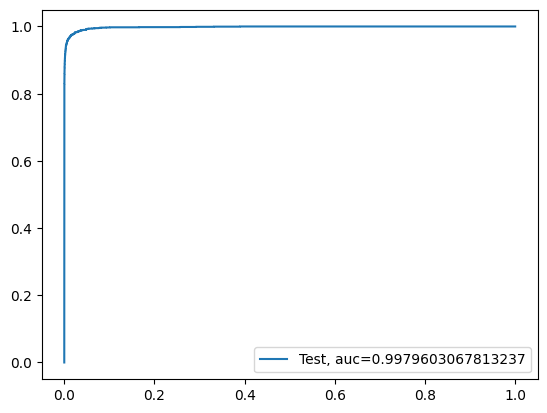

Time Taked by Model: --- 45.97817611694336 seconds --- 
------------------------------------------------------------


In [ ]:
#Run XGBoost ModeL
print("XGBoost Model")
start_time = time.time()
df_Results, XGB_sm_rkf_cv = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling, X_train_rkf_Smote, y_train_rkf_Smote, X_test, y_test)
print("Time Taked by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*60 )

###Oversampling with SMOTE Oversampling with StratifiedKFold Cross Validation

*   We will use SMOTE Oversampling method to handle the class imbalance


In [ ]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    X_train = X_train.astype('float64') # Fix the data type of y_train
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=X.columns)

In [ ]:
X_train_Smote.shape, y_train_Smote.shape, X_test.shape, y_test.shape

((2948390, 20), (2948390,), (370478, 20), (370478,))

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_train_Smote))
print(np.sum(y_test))

1474195
1930


In [ ]:
Data_Imbalance_Handiling  = "SMOTE Oversampling with StratifiedKFold CV "

In [ ]:
# #Run Logistic Regression with L1 And L2 Regularisation
# print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
# df_Results, _, _ = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print("-"*80 )

# #Run KNN ModeL
# print("KNN Model")
# start_time = time.time()
# df_Results, _ = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print("-"*80 )

# #Run Decision Tree Models with 'gini' & 'entropy' criteria
# print("Decision Tree Models with 'gini' & 'entropy' criteria")
# start_time = time.time()
# df_Results, _ = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*80 )

# #Run Random Forest Model
# print("Random Forest Model")
# start_time = time.time()
# df_Results, _ = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote, X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*80)

# #Run XGBoost Model
# print("XGBoost Model")
# start_time = time.time()
# df_Results, _ = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*80)


We will only be training Models "Random Forest" and "XGBoost", Because as observed in the previous methodologies, rest all are not good in 'evauluation metrics' and 'very slow(computationally expensive)' as well

XGBoost Model
Model Accuracy: 0.9953411538606881
Confusion Matrix


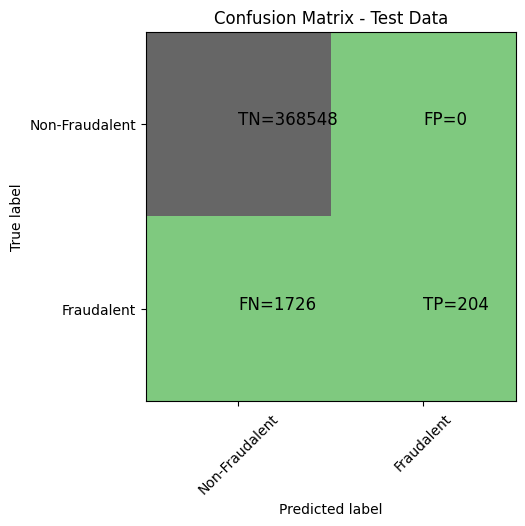

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       1.00      0.11      0.19      1930

    accuracy                           1.00    370478
   macro avg       1.00      0.55      0.59    370478
weighted avg       1.00      1.00      0.99    370478

XGboost roc_value: 0.9966805555547745
XGBoost threshold: 0.0002431252651149407
ROC for the test dataset 99.7%


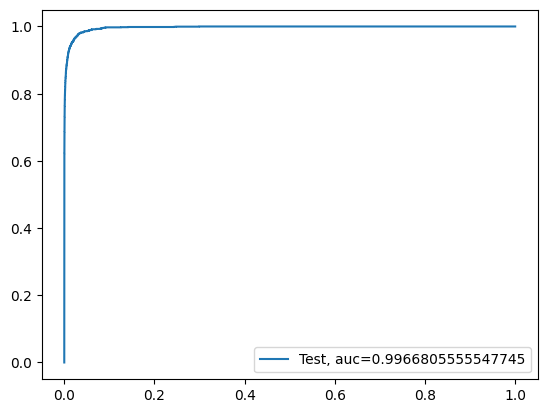

Time Taken by Model: --- 52.635740518569946 seconds --- 
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results, XGB_sm_skf_cv = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*80)

Random Forest Model
Model Accuracy: 0.9947959123078833
Confusion Matrix


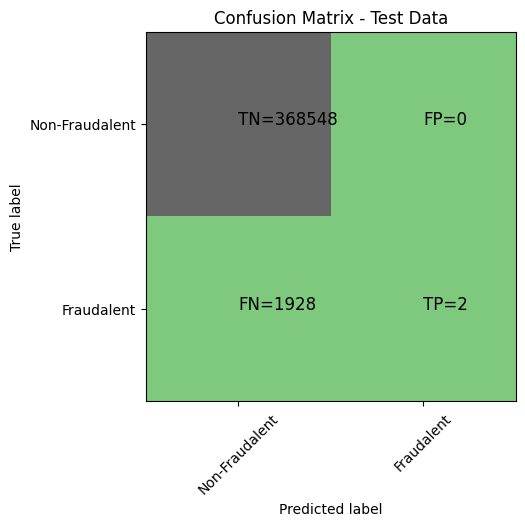

classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368548
           1       1.00      0.00      0.00      1930

    accuracy                           0.99    370478
   macro avg       1.00      0.50      0.50    370478
weighted avg       0.99      0.99      0.99    370478

Random Forest roc_value: 0.9717825213085199
Random Forest threshold: 0.02
ROC for the test dataset 97.2%


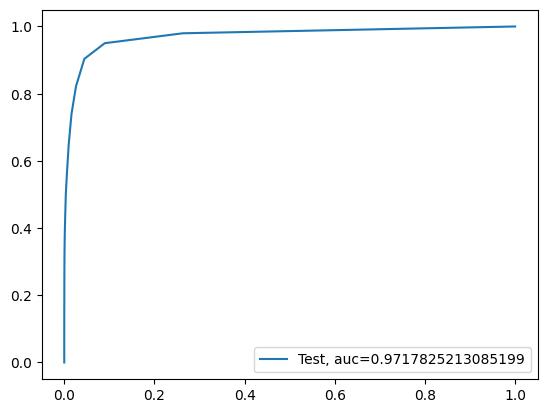

Time Taken by Model: --- 2591.5377130508423 seconds --- 
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results, _ = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*80)

In [ ]:
# # Checking the df_result dataframe which contains consolidated results of all the runs
# df_Results

In [ ]:
# # Using dataframe df_Results: sactter plot of accuracy vs roc value for different models

# import altair as alt
# chart = alt.Chart(df_Results).mark_circle().encode(x='Accuracy', y='roc_value', color='Model')
# chart


##Results for SMOTE Oversampling:
Among both RepeatedKFold & StratifiedKFold techniques, Looking at the 'Accuracy' and 'ROC value', along with the 'precision' and 'recall' we have good results in SMOTE Oversampling with RepeatedKFold technique for "XGBoost"

* Got precision 0.81 and recall 0.90

###ADASYN Oversampling

* We will use ADASYN Oversampling method to handle the class imbalance

In [ ]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    X_train = X_train.astype('float64') # Fix the data type of y_train
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=X.columns)

In [ ]:
X_train_ADASYN.shape, y_train_ADASYN.shape, X_test.shape, y_test.shape

((2948066, 20), (2948066,), (370478, 20), (370478,))

In [ ]:
# Checking the spread of the data in each training and testing
print(np.sum(y_train_ADASYN))
print(np.sum(y_test))

1473871
1930


In [ ]:
Data_Imbalance_Handiling = "ADASYN Oversampling with StratifiedKFold CV"

In [ ]:
# #Run Logistic Regression with L1 And L2 Regularisation
# print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
# df_Results, _, _ = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print("-"*80)

# #Run KNN Model
# print("KNN Model")
# start_time = time.time()
# df_Results, _ = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print("-"*80 )

# #Run Decision Tree Models with 'gini' & 'entropy' criteria
# print("Decision Tree Models with 'gini' & 'entropy' criteria")
# start_time = time.time()
# df_Results, _ = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*80 )

# #Run Random Forest Model
# print("Random Forest Model")
# start_time = time.time()
# df_Results, _ = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*80 )

# #Run XGBoost Model
# print("XGBoost Model")
# start_time = time.time()
# df_Results, _ = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
# print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
# print('-'*80)

We will only be training Models "Random Forest" and "XGBoost", Because as observed in the previous methodologies, rest all are not good in 'evauluation metrics' and 'very slow(computationally expensive)' as well

XGBoost Model
Model Accuracy: 0.9953411538606881
Confusion Matrix


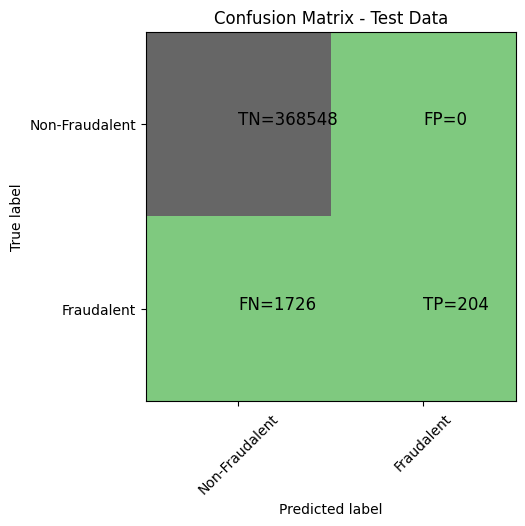

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       1.00      0.11      0.19      1930

    accuracy                           1.00    370478
   macro avg       1.00      0.55      0.59    370478
weighted avg       1.00      1.00      0.99    370478

XGboost roc_value: 0.997707092069081
XGBoost threshold: 0.0005499389371834695
ROC for the test dataset 99.8%


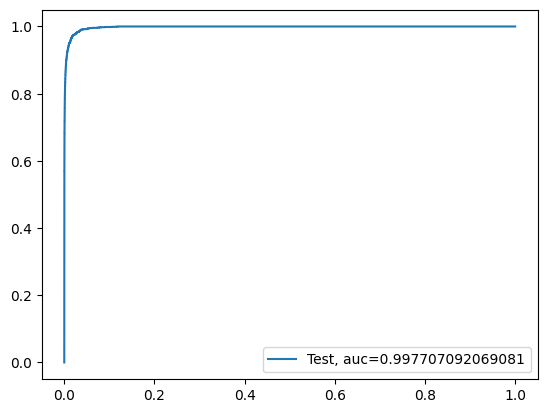

Time Taken by Model: --- 43.660892724990845 seconds --- 
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results, XGB_adasyn_skf_cv = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*80)

Random Forest Model
Model Accuracy: 0.9947932130922754
Confusion Matrix


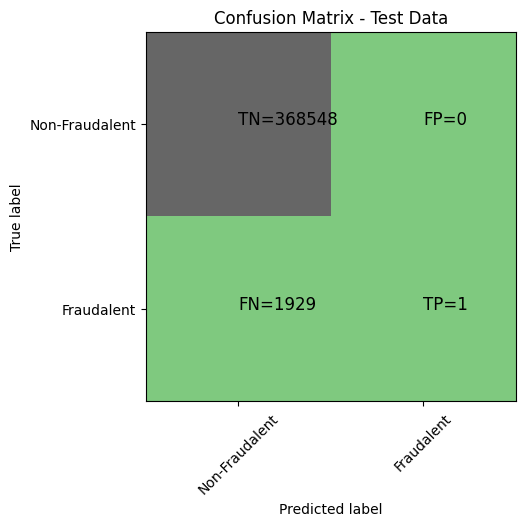

classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368548
           1       1.00      0.00      0.00      1930

    accuracy                           0.99    370478
   macro avg       1.00      0.50      0.50    370478
weighted avg       0.99      0.99      0.99    370478

Random Forest roc_value: 0.9736833261530292
Random Forest threshold: 0.03
ROC for the test dataset 97.4%


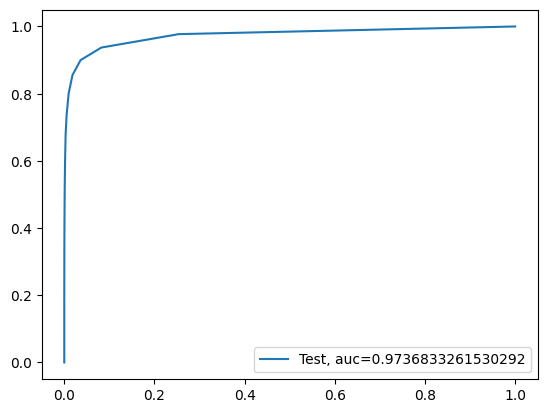

Time Taken by Model: --- 1939.4552001953125 seconds --- 
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results, _ = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds --- " % (time.time() - start_time))
print('-'*80 )

In [ ]:
# # Checking the df_result dataframe which contains consolidated results of all the runs
# df_Results

In [ ]:
# # Using dataframe df_Results: sactter plot of accuracy vs roc value for different models

# import altair as alt
# chart = alt.Chart(df_Results).mark_circle().encode(x='Accuracy', y='roc_value', color='Model')
# chart


####Results for ADASYN Oversampling:
This oversampling technique performed terrible



###Conclusion after running the models on Oversampled data :
Looking at results it seems XGBOOST model with Random Oversampling with RepeatedKFold CV has provided the Good results as "recall" but not good in precision under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results.

* As in the Credit Card Fraud detection handling the False Negatives is very much important.
* So We will Select the models with best recall value 0.96 (having moderate precision 0.61) which is "XGBOOST model with Random Oversampling with RepeatedKFold CV"


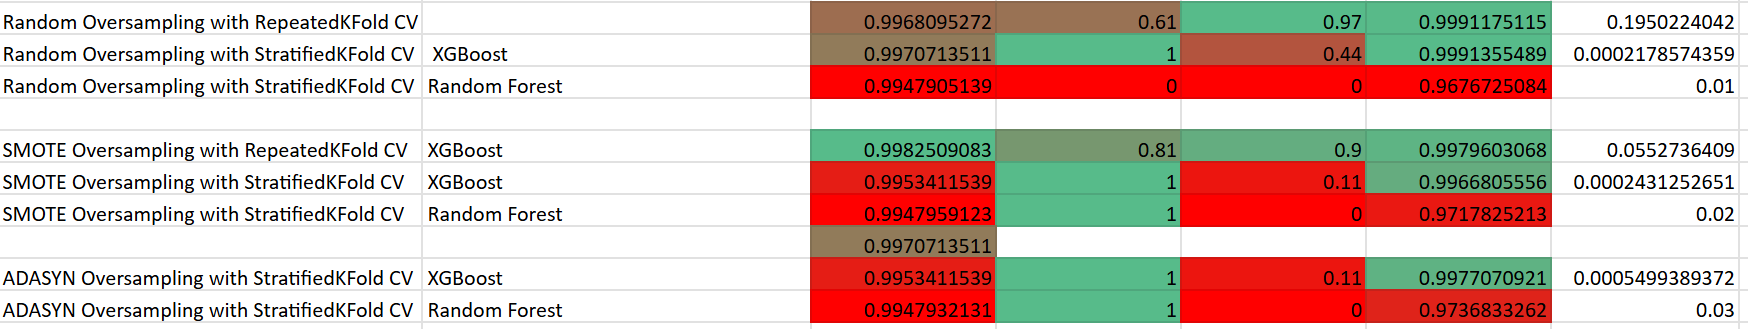

###Hyperparameter Tuning

####HPT - Xgboost Regression

In [ ]:
X_rkf_over.shape, y_rkf_over.shape, X_test.shape, y_test.shape

((2211280, 20), (2211280,), (370478, 20), (370478,))

Performing Hyperparameter tuning using RandomizedSearchCV / GridSearchCV

In [ ]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1,max_delta_step=0,
                missing=None, n_jobs = -1,
                nthread=None, objective='binary:logistic', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, verbosity=1),
                param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs = -1, cv=5)

gsearch1.fit(X_rkf_over, y_rkf_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([40.56077166, 29.67403312, 25.22821856, 24.87427983, 32.02023644]),
  'std_fit_time': array([7.25431064, 0.8762569 , 1.57679302, 0.87758498, 3.45563635]),
  'mean_score_time': array([0.07433252, 0.06735806, 0.06050463, 0.06442094, 0.05234838]),
  'std_score_time': array([0.02304118, 0.02379584, 0.01866892, 0.01787199, 0.00615102]),
  'param_subsample': masked_array(data=[0.9, 0.9, 0.8, 0.9, 0.8],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 1, 1, 5, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[7, 5, 3, 3, 7],
               mask=[False, False, False, False, False],
  

Performing Hyperparameter tuning using GridSearchCV

In [ ]:
# print(gsearch1.cv_results_)
print('-'*80)
print(gsearch1.best_params_)
print('-'*80)
print(gsearch1.best_score_)

--------------------------------------------------------------------------------
{'subsample': 0.9, 'n_estimators': 60, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.7}
--------------------------------------------------------------------------------
nan


Please note that the hyperparameters found above using RandomizedSearchCV and the hyperparameters used below in creating the final model might be
different, the reason being, We have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally
used the one below which gave me the best performance.

Model Accuracy: 0.9941858895804879
Confusion Matrix


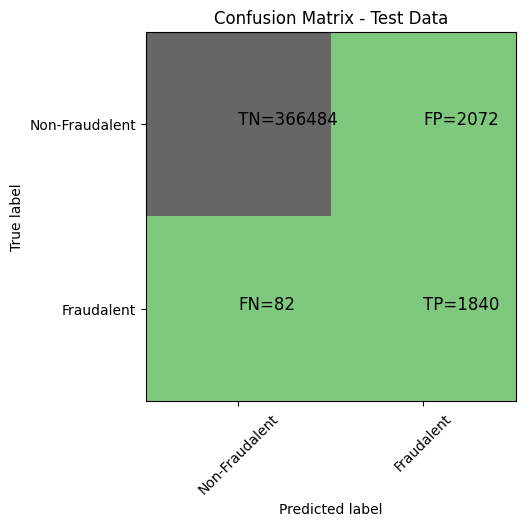

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    368556
           1       0.47      0.96      0.63      1922

    accuracy                           0.99    370478
   macro avg       0.74      0.98      0.81    370478
weighted avg       1.00      0.99      1.00    370478

XGboost roc_value: 0.9985289687642113
XGBoost threshold: 0.2098560482263565
ROC for the test (test_SKF_cv) dataset 99.9%


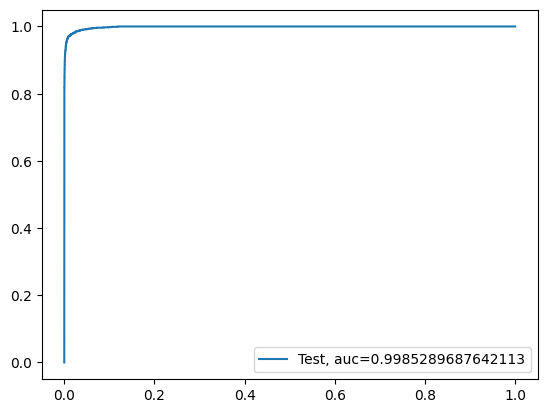

In [ ]:
# Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=np.nan, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

# fit on the dataset
clf.fit(X_rkf_over, y_rkf_over )

y_pred = clf.predict(X_test)

XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test (test_SKF_cv) dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Checking for the importance of features (say Weightage values)
clf.feature_importances_

array([0.0731518 , 0.37828383, 0.02829449, 0.00657082, 0.00730319,
       0.00709382, 0.00661349, 0.01358522, 0.00819002, 0.00602152,
       0.00615124, 0.03402426, 0.05393352, 0.09532062, 0.04479507,
       0.00909474, 0.00580627, 0.19789028, 0.00768326, 0.01019248],
      dtype=float32)

In [ ]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-1])])
print('2nd Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-2])])
print('3rd Top var =', X.columns[imp_var.index(np.sort(clf.feature_importances_)[-3])])

Top var = amt
2nd Top var = transaction_hour
3rd Top var = city_encoded


In [ ]:
# Creating a dataframe with the Importance of Features (say Weightage values)
imp_features = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.feature_importances_))], axis = 1)
imp_features.columns = ['Feature', 'Importance of Features (say Weightage Values)']

Print the important features of the best model to understand the dataset

In [ ]:
imp_features

Feature  Importance of Features (say Weightage Values)
0                 category                                       0.073152
1                      amt                                       0.378284
2                   gender                                       0.028294
3                    state                                       0.006571
4                      zip                                       0.007303
5                      lat                                       0.007094
6                     long                                       0.006613
7                 city_pop                                       0.013585
8                unix_time                                       0.008190
9                merch_lat                                       0.006022
10              merch_long                                       0.006151
11                     age                                       0.034024
12        merchant_encoded                                       0.053934
13            city_encoded                                       0.095321
14             job_encoded                                       0.044795
15       transaction_month                                       0.009095
16         transaction_day                                       0.005806
17        transaction_hour                                       0.197890
18   transaction_dayofweek                                       0.007683
19  transaction_weekofyear                                       0.010192

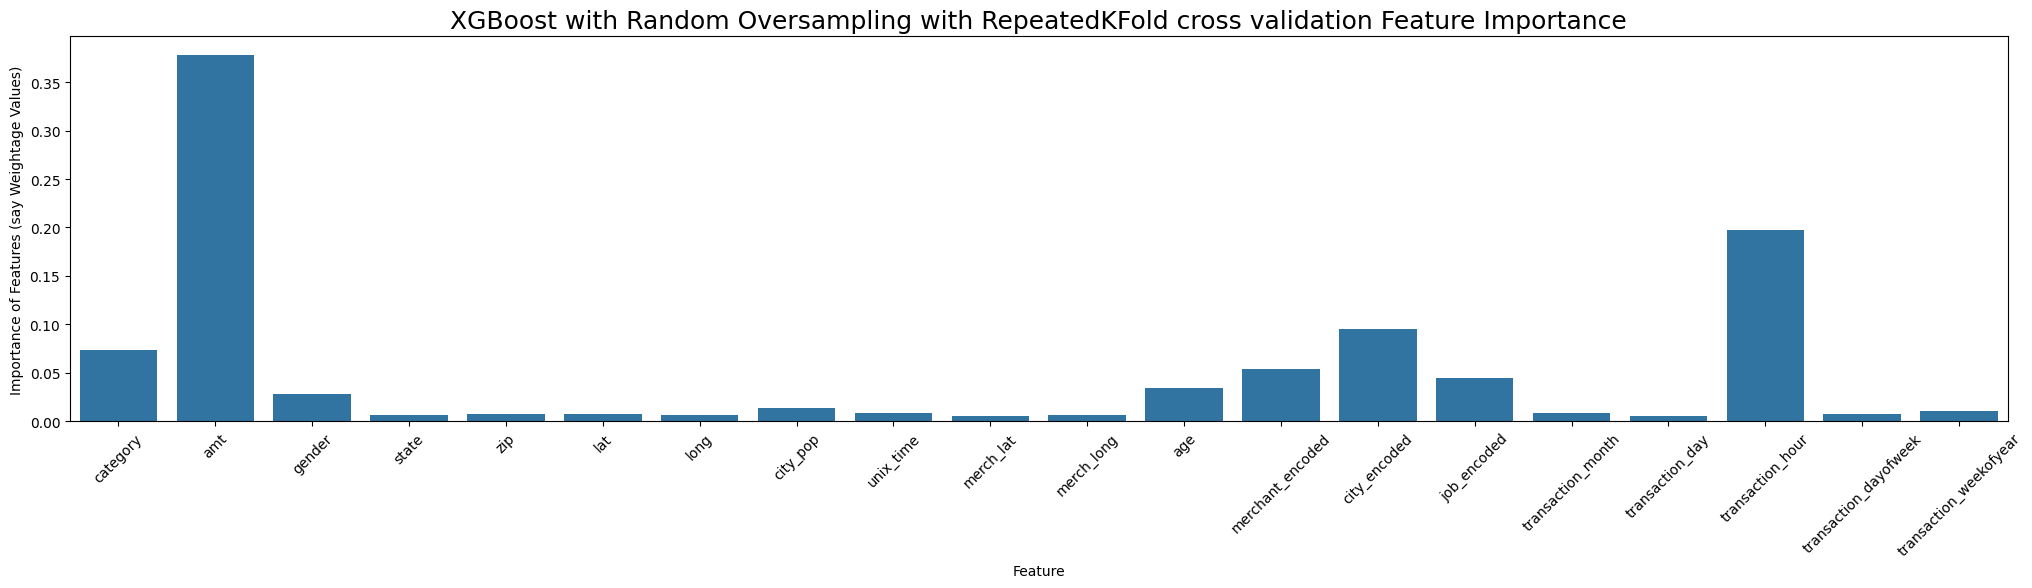

In [ ]:
# Plotting the coefficient values
plt.figure(figsize=(25,5))
sns.barplot(x='Feature', y='Importance of Features (say Weightage Values)', data=imp_features)
plt.title("XGBoost with Random Oversampling with RepeatedKFold cross validation Feature Importance", fontsize=18)
plt.xticks(rotation=45)

plt.show()

##### Selecting Our Model
The final model used which had the best scores across all metrics

In [ ]:
# import joblib
# joblib.dump(xyz, "credit_fraud.pkl")

## Some Other typical Models for Imbalanced Data (Like Credit Card)


### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df_tr[df_tr['is_fraud']==1]

Valid = df_tr[df_tr['is_fraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_train),
                                       contamination=outlier_fraction,random_state=0, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [ ]:
n_outliers = len(Fraud)

####Local Outlier Factor

In [ ]:
LOF = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)

In [ ]:
clf = LOF
clf.fit(X_train)
y_test_pred = clf.fit_predict(X_test)
scores_prediction = clf.negative_outlier_factor_

#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_test_pred[y_test_pred == 1] = 0
y_test_pred[y_test_pred == -1] = 1
n_errors = (y_test_pred != y_test).sum()

# Run Classification Metrics
print("{}: {}".format(clf,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
Plot_confusion_matrix(y_test, y_test_pred)
print("Classification Report :")
print(classification_report(y_test,y_test_pred))

# Calculate roc auc
roc_auc_value = roc_auc_score(y_test, scores_prediction)
print(f"{clf} roc_value: {0}" .format(roc_auc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores_prediction)
threshold = thresholds[np.argmax(tpr-fpr)]
print(f'{clf} threshold: {0}'.format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

####Isolation Forest

In [ ]:
IF = IsolationForest(n_estimators=100, max_samples=len(X_train),
                                       contamination=outlier_fraction,random_state=0, verbose=0)

IsolationForest(contamination=0.005822355331224998, max_samples=1296675,
                random_state=0): 9757
Accuracy Score :
0.9824425653972602


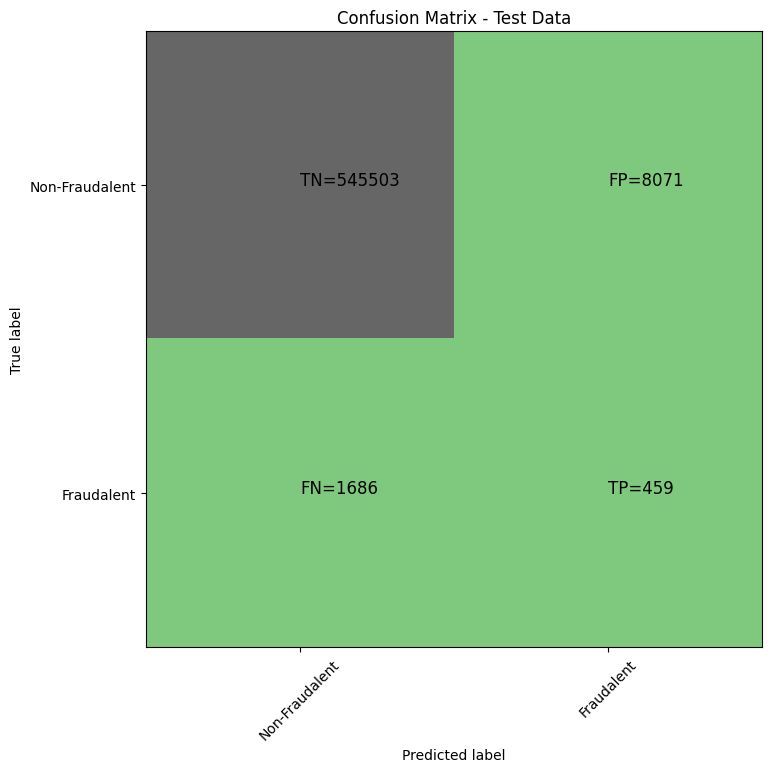

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.05      0.21      0.09      2145

    accuracy                           0.98    555719
   macro avg       0.53      0.60      0.54    555719
weighted avg       0.99      0.98      0.99    555719

IsolationForest(contamination=0.005822355331224998, max_samples=1296675,
                random_state=0) roc_value: 0
IsolationForest(contamination=0.005822355331224998, max_samples=1296675,
                random_state=0) threshold: 0
ROC for the test dataset 22.0%


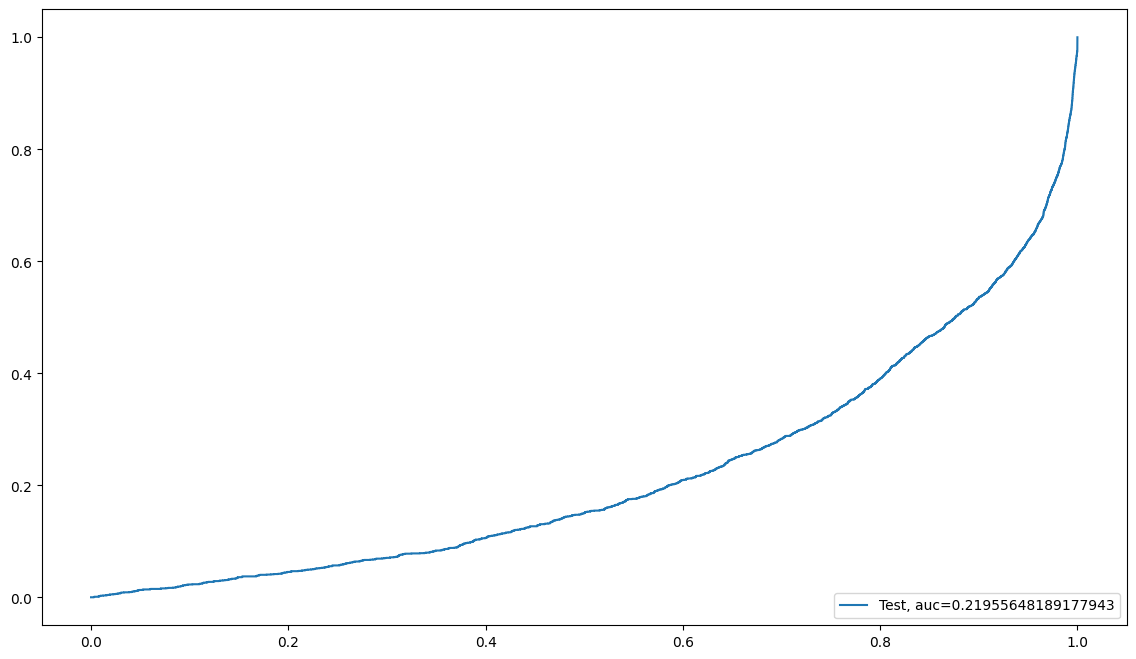

In [ ]:
clf = IF
clf.fit(X_train)
y_test_pred = clf.predict(X_test)
scores_prediction = clf.decision_function(X_test)

#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_test_pred[y_test_pred == 1] = 0
y_test_pred[y_test_pred == -1] = 1
n_errors = (y_test_pred != y_test).sum()

# Run Classification Metrics
print("{}: {}".format(clf,n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_test_pred))
Plot_confusion_matrix(y_test, y_test_pred)
print("Classification Report :")
print(classification_report(y_test,y_test_pred))

# Calculate roc auc
roc_auc_value = roc_auc_score(y_test, scores_prediction)
print(f"{clf} roc_value: {0}" .format(roc_auc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores_prediction)
threshold = thresholds[np.argmax(tpr-fpr)]
print(f'{clf} threshold: {0}'.format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

###Results of Some Other typical Models for Imbalanced Data

* These models whether 'Isolation Forest' or 'Local Outlier Factor' performed terribly bad.

#Grand Conclusion
###In the oversample cases
Out of all the models with Oversampling we build found that the XGBOOST model with Random Oversampling with RepeatedKFold CV gave us the best recall of 0.96 and descent precision 0.64, accuracy, ROC on oversampled data.

* Post that we performed hyperparameter tuning, But the metrics like recall and precision were good without the hyperparameter tunning.

* So we will go and save the XGBOOST model with Random Oversampling with RepeatedKFold CV without hyperparameter tuning

###In the case of Overall (without Oversample and with Oversample case)

However, of all the models we created we found XGBOOST model with RepeatedKFold CV (without any oversampling or
undersampling) gave us the best metrics (results) Good precision 0.96 and descent recall 0.87.

* Post that we performed hyperparameter tuning, But the metrics like recall and precision were good without the hyperparameter tunning.

* So we will go and save the XGBOOST model with RepeatedKFold CV without hyperparameter tuning


##### Other typical Models for Imbalanced Data performed terribly bad whether 'Isolation Forest' or 'Local Outlier Factor'.

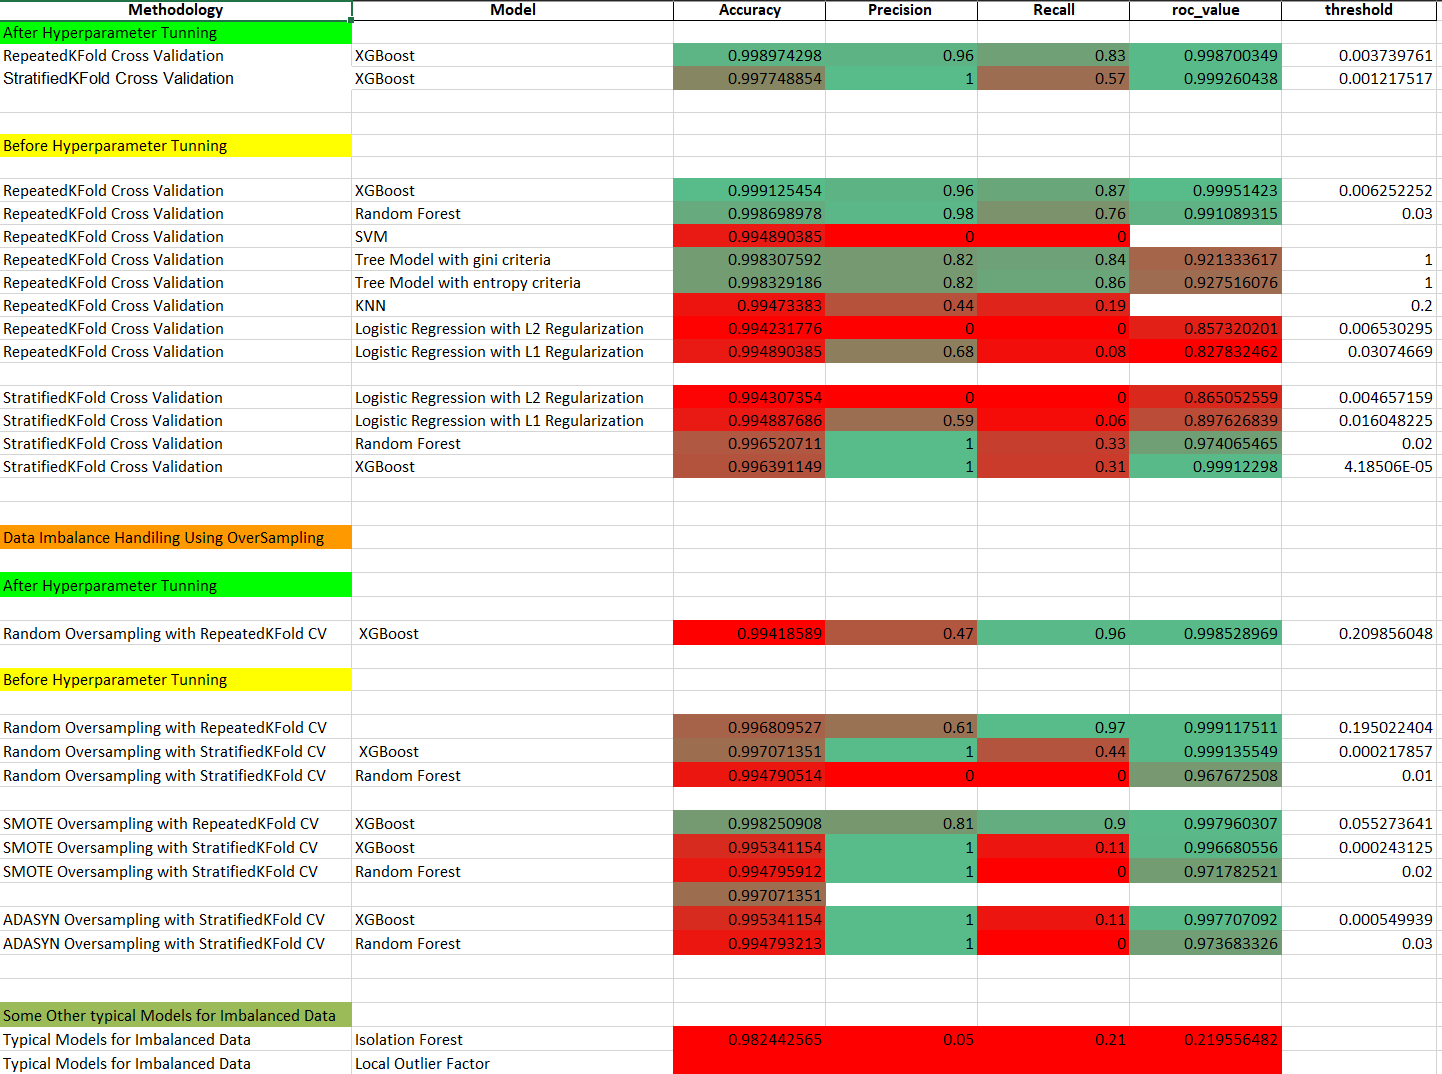

## Save Best Models
We will be saving two Models

* For Best Recall -->> XGBOOST model with Random Oversampling with RepeatedKFold CV

* For Best in over all Good Precision and Descent Recall-->> XGBOOST model with RepeatedKFold CV

In [ ]:
# For Best Recall -->> XGBOOST model with Random Oversampling with RepeatedKFold CV
import joblib
joblib.dump(XGB_rkf_cv, "XGB_rkf_cv_cc_fraud.pkl")
print("Model saved as XGB_rkf_cv_cc_fraud.pkl")

Model saved as XGB_rkf_cv_cc_fraud.pkl


In [ ]:
# For Best in over all Good Precision and Descent Recall-->> XGBOOST model with RepeatedKFold CV
import joblib
joblib.dump(XGB_ros_rkf_cv, "XGB_ros_rkf_cv_cc_fraud.pkl")
print("Model saved as XGB_ros_rkf_cv_cc_fraud.pkl")

Model saved as XGB_ros_rkf_cv_cc_fraud.pkl


In [ ]:
df_Models_Evauluation_Metrics = df_Results

In [ ]:
#save the df_results dataframe into xls format
df_Models_Evauluation_Metrics.to_excel('/content/drive/My Drive/df_Models_Evauluation_Metrics.xlsx')